# Project: Cosmetics & Personal Care Sales.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Quest">Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction




> **Descriptions:**  This dataset has information about Cosmetics & Personal Care Products in Egyption B2B company. The company sell it's products to other companies. Dataset has 4 main tables:**
        > - **Products.**
        > - **Accounts.**
        > - **Manufacturers.**
        > - **Properties.**
 
 
**Products dataset columns descriptions:**

- **DATE:** The Date that item inserted in the invoice
- **ClintName:**Customer Name.
- **AccountId:** Customer ID.
- **ProductName:** The name of every product.
- **ProductId:** Product ID
- **CompanyId:** Manufacturers ID
- **CATEGORY1:** Product Category ID.
- **CATEGORY3:** Product Subcategory ID.
- **InvoicesId:**Invoice ID.
- **UnitSellPrice:** Sales Price.
- **CostPrice:** Cost Price.
- **QTY:** product quantity.

**Accounts dataset columns descriptions:**
- **CLIENT_ID:** Customer ID.
- **LOCATION_ID:** Region ID.
- **LOCATION_NAME:** Region Name.

 
**Manufacturers dataset columns descriptions:**
- **COP_ID:** Manufacturer ID.
- **COP_NAME:** Manufacturer Name.

**Properties dataset columns descriptions:**
- **PROPRTIES_ID:**  Product Category  ID.
- **PROPRTIES_NAME:**  Properties  Category Name.
- **PROPRTIES_TYPE:** Properties Type (1 mean category and 2 mean subcategory).

<a id='Quest'></a>
## **Questions:**



**1. What is the Total revenue, Gross Profit and COGS?**

**2. What are the highest revenue, most sold and most profitable Products? (top 10)**    

**3. What is the highest revenue, most selling and most profitable Category?**

**4. What are the highest revenue, most selling and most profitable Subcategories? (top 10)**

**5. What are the highest revenue, most selling and most profitable Regions? (top 10)**

**6. What are the highest revenue and profit generating Manufacturers? (top 10)**

**7. What are the highest revenue and profit generating Client? (top 10)**

**8. What are the revenue, profit and sold quantity trends per month?**

**9. Is there a correlation between:**

    - Sales_Price and profit?
    - Cost and profit?
    - Quantity and profit?

**10. Do the most expensive Producrs generte the most profit?**

### importing libraries that will be used to investigate Dataset

In [117]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
sns.set_style("whitegrid")
pd.options.display.max_colwidth = 20
pd.options.display.max_columns = 50

<a id='wrangling'></a>
## Data Wrangling

 **This is a three step process:**

*  Gathering the data from Dataset and investegate it trying to understand more details about it. 


*  Assessing data to identify any issues with data types, structure, or quality.


*  Cleaning data by changing data types, replacing values, removing unnecessary data and modifying Dataset for easy and fast analysis.


### Gathering Data

In [3]:
# install openpyxl to read excell files

!conda install -c anaconda -y openpyxl

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/muhammet/anaconda3

  added / updated specs:
    - openpyxl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2021.10.8          |   py39h06a4308_0         155 KB  anaconda
    conda-4.13.0               |   py39h06a4308_0         995 KB  anaconda
    openpyxl-3.0.9             |     pyhd3eb1b0_0         159 KB  anaconda
    ------------------------------------------------------------
                                           Total:         1.3 MB

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.10.3-py39h06a4308_0 --> anaconda::conda-4.13.0-py39h06a4308_0

The following packages will be SUP

In [556]:
# loading Excell files in to d Dataframes  //products, accounts, manufacturers and properties//

products = pd.read_excel("./Invoices and products.xlsx")
accounts = pd.read_excel("./account  region.xlsx")
manufacturers = pd.read_excel("./company.xlsx")
properties = pd.read_excel("./proprties.xlsx")

In [557]:
#checking 5 rows sample from Dataframes

products.head(5)

,DATE_,ClintName,AccountId,ProductName,ProductId,CompanyId,CATEGORY1,CATEGORY3,InvoicesId,UnitSellPrice,ConsumerPrice,CostPrice,QTY
0,2020-05-03,clint2042,1951,سويت حرير مزيل شعر,5307,31.0,1.0,26.0,3,4.31958,9.0,3.750000,24.0
1,2020-05-03,clint2042,1951,ايزي سويت عرض 3 ...,4307,42.0,1.0,26.0,3,4.48166,8.0,3.500000,12.0
2,2020-05-03,clint2042,1951,ماجيك كريم,5954,31.0,1.0,7.0,3,7.75000,9.5,6.833000,6.0
3,2020-05-03,clint2042,1951,بنادور كريم ابيض,4660,31.0,1.0,7.0,3,41.55833,55.0,33.006798,6.0
4,2020-05-03,clint2042,1951,بنادور كريم اصفر,4661,31.0,1.0,7.0,3,41.55666,55.0,36.666000,3.0


In [558]:
accounts.head(5)

,CLIENT_NAME,CLIENT_ID,LOCATION_ID,LOCATION_NAME
0,clint1639,1548,9,Region171
1,clint1641,1550,5,Region1-5
2,clint1646,1555,5,Region1-5
3,clint1647,1556,5,Region1-5
4,clint1651,1560,5,Region1-5


In [559]:
manufacturers.head(5)

,COP_ID,COP_NAME
0,1,تركيبات
1,50,بيندولين
2,2,سرنجات
3,3,بلاستر
4,51,بيور


In [560]:
properties.head(5)

,PROPRTIES_ID,PROPRTIES_NAME,PROPRTIES_TYPE
0,1,اكسسوار,1
1,164,مبيدات,2
2,2,مستلزمات,1
3,3,ورقيات,1
4,165,مكواة شعر,2


### Assessing Data

In [561]:
# First thing we need to merge all tables and Select important columns only then save them into single dataframe //df//

first = products.merge(accounts, how="left", left_on="AccountId", right_on="CLIENT_ID")
second = first.merge(manufacturers, how="left", left_on="CompanyId", right_on="COP_ID")
third = second.merge(properties, how="left", left_on="CATEGORY1", right_on="PROPRTIES_ID")
fourth = third.merge(properties, how="left", left_on="CATEGORY3", right_on="PROPRTIES_ID")
fourth.shape

(523318, 25)

In [562]:
# Select important columns only 

df = fourth[["DATE_", 
             "AccountId",
             "InvoicesId",
             "ProductName",
             "PROPRTIES_NAME_x",
             "PROPRTIES_NAME_y",
             "COP_NAME", 
             "LOCATION_NAME",
             "UnitSellPrice",
             "CostPrice",
             "QTY"
            ]]

In [563]:
# Check firrst five columns from new df

df.head(5)

,DATE_,AccountId,InvoicesId,ProductName,PROPRTIES_NAME_x,PROPRTIES_NAME_y,COP_NAME,LOCATION_NAME,UnitSellPrice,CostPrice,QTY
0,2020-05-03,1951,3,سويت حرير مزيل شعر,اكسسوار,ازالة شعر,متنوع,Region11135,4.31958,3.750000,24.0
1,2020-05-03,1951,3,ايزي سويت عرض 3 ...,اكسسوار,ازالة شعر,ايزي كير,Region11135,4.48166,3.500000,12.0
2,2020-05-03,1951,3,ماجيك كريم,اكسسوار,كريم شعر,متنوع,Region11135,7.75000,6.833000,6.0
3,2020-05-03,1951,3,بنادور كريم ابيض,اكسسوار,كريم شعر,متنوع,Region11135,41.55833,33.006798,6.0
4,2020-05-03,1951,3,بنادور كريم اصفر,اكسسوار,كريم شعر,متنوع,Region11135,41.55666,36.666000,3.0


In [564]:
#checking Dataframe basic informations (columns names, number of values, data types ......)

df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523318 entries, 0 to 523317
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE_             523318 non-null  datetime64[ns]
 1   AccountId         523318 non-null  int64         
 2   InvoicesId        523318 non-null  int64         
 3   ProductName       523318 non-null  object        
 4   PROPRTIES_NAME_x  522552 non-null  object        
 5   PROPRTIES_NAME_y  487439 non-null  object        
 6   COP_NAME          519622 non-null  object        
 7   LOCATION_NAME     511390 non-null  object        
 8   UnitSellPrice     523318 non-null  float64       
 9   CostPrice         523318 non-null  float64       
 10  QTY               523318 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 269.9 MB


#### Todo 
**- Reduced Dataset size which is 269.9 MB.**

**- Change AccountId and InvoicesId data types**


In [565]:
#checking Dataframe  (number of rows and columns)

df.shape

(523318, 11)

In [566]:
df.describe().iloc[1:, :].style.highlight_min(subset=["UnitSellPrice"], color="#5DADE2")\
                                    .highlight_max(subset=["UnitSellPrice"], color="#7DCEA0 ")\
                                    .highlight_min(subset=["CostPrice"], color="#7DCEA0 ")\
                                    .highlight_max(subset=["CostPrice"], color="#5DADE2")\
                                    .highlight_min(subset=["QTY"], color="#C39BD3")\
                                    .highlight_max(subset=["QTY"], color="#C39BD3")

,AccountId,InvoicesId,UnitSellPrice,CostPrice,QTY
mean,1412.515946,24038.573082,22.358202,20.038836,8.289315
std,711.945845,14543.382508,32.834781,32.373985,52.950912
min,141.000000,3.000000,0.000000,-134.860016,0.005000
25%,862.000000,11236.000000,6.450000,5.500000,1.000000
50%,1326.000000,23471.000000,12.220000,10.661362,2.000000
75%,2042.000000,36380.000000,24.000000,21.000000,5.000000
max,2764.000000,50313.000000,1760.120000,8167.000000,15000.000000


**Maximum UnitSellPrice and CostPrice are so high.**

**Minimum UnitSellPrice is zero.**

**Minimum CostPrice is -134.86 EGP which is very suspecious**

**Minimum QTY is 0.005**

**Maximum QTY is 15000**


In [567]:
#checking more information and descriptive statistics for Categorical variables

df.describe(include="O")

,ProductName,PROPRTIES_NAME_x,PROPRTIES_NAME_y,COP_NAME,LOCATION_NAME
count,523318,522552,487439,519622,511390
unique,5222,4,138,78,80
top,بلاستر سيلك بلاس...,اكسسوار,معجون اسنان,متنوع,Region1147
freq,2610,341194,33106,92922,34030


In [568]:
# checking for NaN values patients

df.isna().sum()

DATE_                   0
AccountId               0
InvoicesId              0
ProductName             0
PROPRTIES_NAME_x      766
PROPRTIES_NAME_y    35879
COP_NAME             3696
LOCATION_NAME       11928
UnitSellPrice           0
CostPrice               0
QTY                     0
dtype: int64

**There are alot of Nans on PROPRTIES_NAME_x, PROPRTIES_NAME_y, COP_NAME and LOCATION_NAME**

In [569]:
#checking for duplicated rows 

df.duplicated().sum()

36

In [570]:
# checking for duplicated with subset 

df[df.duplicated(keep=False)]

,DATE_,AccountId,InvoicesId,ProductName,PROPRTIES_NAME_x,PROPRTIES_NAME_y,COP_NAME,LOCATION_NAME,UnitSellPrice,CostPrice,QTY
126,2020-04-18,2042,14,نيفيا رول ريش با...,اكسسوار,مزيل عرق,نيفيا,Region1147,22.850,20.362000,1.0
127,2020-04-18,2042,14,نيفيا رول ريش با...,اكسسوار,مزيل عرق,نيفيا,Region1147,22.850,20.362000,1.0
261,2020-04-18,451,31,جونسون زيت 75 م ...,اكسسوار,زيت شعر,جونسون,Region1-24,16.500,14.726000,3.0
262,2020-04-18,451,31,جونسون زيت 75 م ...,اكسسوار,زيت شعر,جونسون,Region1-24,16.500,14.726000,3.0
652,2020-04-18,1349,43,سيجنال 50 مل وسط...,اكسسوار,معجون اسنان,ليفر,Region171,7.490,6.625000,12.0
...,...,...,...,...,...,...,...,...,...,...,...
104848,2020-09-12,178,9058,لاصق فئران كتاب ...,اكسسوار,مبيدات,متنوع,Region1-62,6.490,5.000087,4.0
480706,2022-01-26,2688,45665,برمنجانات بوتاسيوم,مستلزمات,تركيبات,متنوع,Region11325,2.494,2.389914,5.0
480707,2022-01-26,2688,45665,برمنجانات بوتاسيوم,مستلزمات,تركيبات,متنوع,Region11325,2.494,2.389914,5.0
483266,2022-01-29,1880,45943,لونا زبده(فانيلي...,اكسسوار,زبدة كاكاو,لونا,NaN,7.530,7.388000,5.0


**There are 36 Duplicated values but we can not consider them as duplicates**

In [571]:
#checking number of unique values

df.nunique()

DATE_                 611
AccountId             898
InvoicesId          47105
ProductName          5222
PROPRTIES_NAME_x        4
PROPRTIES_NAME_y      138
COP_NAME               78
LOCATION_NAME          80
UnitSellPrice       12987
CostPrice           21407
QTY                   210
dtype: int64

##  Cleaning Data

### <font color='blue'>Missing Data issues</font>
 
1. Rename columns for clarity.
2. Replace Nans with Not Avialable.

### <font color='blue'>Quality issues</font>

1. Change Customer_Id and Invoice_Id columns data types to object.
2. Add new column for profit ( Sales_price  - Cost) * QTY.
3. Add new columns for Day_name and Month_name.
4. Check outlaiers and confirm if there is any typing mistake.
5. Fix Wrong values and recalculate profit.
6. Reduce Dataframe memory size.
7. Add new column to define the Product price level ("Low", "Medium", "High", "Very High")

In [572]:
# make copy of origenal dataframe to clean them

df_clean = df.copy()

### <font color='blue'>Missing Data issues</font>

#### 1. Rename columns for clarity.

In [573]:
new_columns = {"DATE_": "Date",
              "AccountId":"Customer_Id",
              "InvoicesId":"Invoice_Id",
              "ProductName": "Product",
              "PROPRTIES_NAME_x":"Category",
              "PROPRTIES_NAME_y":"Subcategory",
              "COP_NAME":"Manufacturer",
              "LOCATION_NAME":"Region_Id",
              "UnitSellPrice": "Sales_Price",
              "CostPrice":"Cost",
               "QTY":"Quantity"}

df_clean = df_clean.rename(columns=new_columns)

In [574]:
#confirm changes 

df_clean.columns

Index(['Date', 'Customer_Id', 'Invoice_Id', 'Product', 'Category',
       'Subcategory', 'Manufacturer', 'Region_Id', 'Sales_Price', 'Cost',
       'Quantity'],
      dtype='object')

#### 2. Replace Nans with Not Avialable

In [575]:
fill_na = "Unknown"

df_clean.fillna(fill_na, inplace=True)

In [576]:
#confirm changes 

df_clean.isna().sum()


Date            0
Customer_Id     0
Invoice_Id      0
Product         0
Category        0
Subcategory     0
Manufacturer    0
Region_Id       0
Sales_Price     0
Cost            0
Quantity        0
dtype: int64

### <font color='blue'>Quality issues</font>

#### 1. Change Customer_Id and Invoice_Id columns data types to object.

In [577]:
df_clean.Customer_Id = df_clean.Customer_Id.astype("O") 
df_clean.Invoice_Id = df_clean.Invoice_Id.astype("O") 

In [578]:
# confirm changes 

df_clean[["Customer_Id", "Invoice_Id"]].dtypes

Customer_Id    object
Invoice_Id     object
dtype: object

#### 2. Add new column for profit ( Sales_price  - Cost) * QTY and new column for revenue Sales_price * QTY.

In [579]:
df_clean["Profit"] = (df_clean.Sales_Price - df_clean.Cost) * df_clean.Quantity
df_clean["Revenue"] = df_clean.Sales_Price  * df_clean.Quantity


In [580]:
# confirm changes

df_clean.sample(2)

,Date,Customer_Id,Invoice_Id,Product,Category,Subcategory,Manufacturer,Region_Id,Sales_Price,Cost,Quantity,Profit,Revenue
333693,2021-07-18,1794,30700,بيروسول طائر 300 م,اكسسوار,مبيدات,متنوع,Region1869,14.90166,14.083,6.0,4.911959,89.40996
329941,2021-07-15,1949,30385,املا كريم مصري 1...,اكسسوار,كريم شعر,فاتيكا,Region11135,18.89000,15.688,1.0,3.202000,18.89000


#### 3. Add new columns for Day_name and Month_name.

In [581]:
df_clean["Month"] = df_clean.Date.dt.strftime("%Y-%m")
df_clean["Day"] = df_clean.Date.dt.strftime("%w")

In [582]:
df_clean[["Month", "Day"]].sample(5)

,Month,Day
116679,2020-09,1
244380,2021-03,4
86941,2020-08,3
322268,2021-07,2
383552,2021-09,4


#### 4. Check outlaiers and confirm if there is any typing mistake.

In [583]:
def outliers(df, col, asc):
    """ This function is to select outliers from dataframe on 
    a selected column then sort the result Ascending or descending 

    Args:
        df (dataframe): pandas dataframe
        col (string): column name
        asc (boolean): True or False

    Returns:
        dataframe: sorted data frame Ascending or descending that includes outliers of selected column.
    """
    mean = df[col].mean()
    std =  df[col].std()
    cut_off = std*3
    lower, upper = mean -cut_off , mean +cut_off
    outliers = df[(df[col] <lower)|(df[col] >upper)]
    outliers = outliers.sort_values(col, ascending=asc)

    return outliers

**Check ouliers on Sales_Price**

In [584]:
# Select columns to filter with

col_filter = ["Product", "Category", "Sales_Price", "Cost", 'Quantity', "Profit", "Revenue"]

In [585]:
outliers(df_clean,'Sales_Price', False ).loc[:, col_filter].head(10)

,Product,Category,Sales_Price,Cost,Quantity,Profit,Revenue
72138,ثيرابي ليس بروتي...,اكسسوار,1760.12,1650.0,1.0,110.12,1760.12
131353,كرسي مريض بقاعدة...,مستلزمات,975.00,975.0,1.0,0.00,975.00
131361,كرسي مريض,مستلزمات,880.00,880.0,1.0,0.00,880.00
409681,جهاز ضغط ديجيتال...,مستلزمات,745.05,685.0,1.0,60.05,745.05
97281,ترمومتر جبهة ( م...,مستلزمات,660.05,650.0,1.0,10.05,660.05
97294,ترمومتر جبهة ( م...,مستلزمات,660.05,650.0,1.0,10.05,660.05
320945,جهاز ضغط ديجيتال...,مستلزمات,600.04,550.0,1.0,50.04,600.04
116906,ماكينه ازله شعر ...,اكسسوار,595.04,550.0,1.0,45.04,595.04
53057,جهاز نفس نيوبليز...,مستلزمات,595.04,550.0,1.0,45.04,595.04
17983,ماكينه ازله شعر ...,اكسسوار,595.04,550.0,1.0,45.04,595.04


In [586]:
outliers(df_clean,'Sales_Price', True ).loc[:, col_filter].head(10)

,Product,Category,Sales_Price,Cost,Quantity,Profit,Revenue
313296,سافلون جركن,مستلزمات,120.91,105.000000,1.0,15.910000,120.91
375837,سافلون جركن,مستلزمات,120.91,105.000000,1.0,15.910000,120.91
332360,سافلون جركن,مستلزمات,120.91,105.000000,1.0,15.910000,120.91
406623,سافلون جركن,مستلزمات,120.91,105.000000,1.0,15.910000,120.91
443331,مولفكس (مقاس 4) ...,ورقيات,121.01,117.634605,1.0,3.375395,121.01
501327,برطمان حلمات سيل...,اكسسوار,121.01,110.000000,1.0,11.010000,121.01
385635,جوانتي نتريل ازر...,مستلزمات,121.01,110.000000,1.0,11.010000,121.01
496668,برطمان حلمات سيل...,اكسسوار,121.01,110.000000,1.0,11.010000,121.01
236677,سودو كريم 125 جم,اكسسوار,121.01,110.000000,1.0,11.010000,121.01
451776,مولفكس (مقاس 3)5...,ورقيات,121.01,117.862701,1.0,3.147299,121.01


In [587]:
df_clean[df_clean.Sales_Price >=600].shape[0]

7

In [588]:
df_clean[df_clean.Sales_Price == 0].shape[0]

120

**Check ouliers on Cost**

In [589]:
outliers(df_clean,'Cost', False ).loc[:, col_filter].head(10)

,Product,Category,Sales_Price,Cost,Quantity,Profit,Revenue
441589,وان ازرق (عادي) ...,اكسسوار,8.47,8167.000000,1.0,-8158.530000,8.47
72138,ثيرابي ليس بروتي...,اكسسوار,1760.12,1650.000000,1.0,110.120000,1760.12
131353,كرسي مريض بقاعدة...,مستلزمات,975.00,975.000000,1.0,0.000000,975.00
131361,كرسي مريض,مستلزمات,880.00,880.000000,1.0,0.000000,880.00
122634,اولويز حساس دوبل...,ورقيات,14.74,735.803406,3.0,-2163.190217,44.22
409681,جهاز ضغط ديجيتال...,مستلزمات,745.05,685.000000,1.0,60.050000,745.05
97281,ترمومتر جبهة ( م...,مستلزمات,660.05,650.000000,1.0,10.050000,660.05
97294,ترمومتر جبهة ( م...,مستلزمات,660.05,650.000000,1.0,10.050000,660.05
116424,ماكينه ازله شعر ...,اكسسوار,595.04,550.000000,1.0,45.040000,595.04
320945,جهاز ضغط ديجيتال...,مستلزمات,600.04,550.000000,1.0,50.040000,600.04


In [590]:
outliers(df_clean,'Cost', True ).loc[:, col_filter].head(10)

,Product,Category,Sales_Price,Cost,Quantity,Profit,Revenue
187227,حفاضات فاين لايف...,ورقيات,72.83000,-134.860016,2.0,415.380032,145.66000
198194,حفاضات فاين لايف...,ورقيات,72.83000,-134.860016,1.0,207.690016,72.83000
208073,حفاضات فاين لايف...,ورقيات,72.82750,-134.860016,4.0,830.750063,291.31000
215941,حفاضات فاين لايف...,ورقيات,72.83000,-134.859985,1.0,207.689985,72.83000
443668,وان ازرق (عادي) ...,اكسسوار,8.47166,-130.118118,6.0,831.538670,50.82996
443471,وان ازرق (عادي) ...,اكسسوار,8.47000,-130.118118,3.0,415.764355,25.41000
470303,وان ازرق (عادي) ...,اكسسوار,8.47000,-130.118118,3.0,415.764355,25.41000
444379,وان ازرق (عادي) ...,اكسسوار,8.47166,-130.118118,6.0,831.538670,50.82996
518519,وان ازرق (عادي) ...,اكسسوار,8.47000,-130.118118,1.0,138.588118,8.47000
471761,وان ازرق (عادي) ...,اكسسوار,8.47000,-130.118118,2.0,277.176237,16.94000


In [591]:
df_clean[df_clean.Cost < 0].shape[0]

66

In [592]:
df_clean[df_clean.Cost == 0].shape[0]

8

In [593]:
df_clean[df_clean.Cost > 500].shape[0]

21

**Check ouliers on Profit**

In [594]:
outliers(df_clean,'Profit', False ).loc[:, col_filter].head(10)

,Product,Category,Sales_Price,Cost,Quantity,Profit,Revenue
28094,*************,اكسسوار,144.86949,14.017177,99.0,12954.379024,14342.07951
132082,كاندم عازل صيني ...,مستلزمات,3.59395,-48.540943,48.0,2502.474871,172.50960
131950,كاندم عازل صيني ...,مستلزمات,3.59395,-48.540943,48.0,2502.474871,172.50960
10197,جلات كريم فرد شع...,اكسسوار,28.00193,19.258064,186.0,1626.359026,5208.35898
511777,مناديل زينه 550 ...,ورقيات,13.20073,11.104972,720.0,1508.945842,9504.52560
511822,اولويز ليلي طويل...,ورقيات,20.45729,17.361746,480.0,1485.861200,9819.49920
122847,كاندم عازل صيني ...,مستلزمات,3.59375,-48.540943,24.0,1251.232635,86.25000
117816,كاندم عازل صيني ...,مستلزمات,3.59375,-48.540943,24.0,1251.232635,86.25000
126425,كاندم عازل صيني ...,مستلزمات,3.59375,-48.540943,24.0,1251.232635,86.25000
122997,كاندم عازل صيني ...,مستلزمات,3.59375,-48.540943,24.0,1251.232635,86.25000


In [595]:
outliers(df_clean,'Profit', True ).loc[:, col_filter].head(10)

,Product,Category,Sales_Price,Cost,Quantity,Profit,Revenue
441589,وان ازرق (عادي) ...,اكسسوار,8.47000,8167.000000,1.0,-8158.530000,8.47000
114228,كاندم عازل صيني ...,مستلزمات,3.59375,342.243896,24.0,-8127.603516,86.25000
114203,كاندم عازل صيني ...,مستلزمات,3.59375,342.243896,24.0,-8127.603516,86.25000
114464,كاندم عازل صيني ...,مستلزمات,3.59416,342.243896,12.0,-4063.796838,43.12992
122634,اولويز حساس دوبل...,ورقيات,14.74000,735.803406,3.0,-2163.190217,44.22000
68743,ماسك طبيب مغلف(5...,مستلزمات,145.00000,194.257111,30.0,-1477.713318,4350.00000
113455,كاندم عازل صيني ...,مستلزمات,3.59500,342.243896,4.0,-1354.595586,14.38000
31383,نتروجينا لوشن هي...,اكسسوار,74.34000,108.634087,30.0,-1028.822598,2230.20000
5720,سرنجات ماسكو 5سم...,مستلزمات,0.70228,1.467128,1200.0,-917.817932,842.73600
115613,ماسك طبيب مغلف(5...,مستلزمات,110.00000,194.257111,9.0,-758.313995,990.00000


In [596]:
df_clean[df_clean.Profit == 0].shape[0]

1481

In [597]:
df_clean[df_clean.Profit <0].shape[0]

10663

**Check ouliers on Quantity**

In [598]:
outliers(df_clean,'Quantity', False ).loc[:, col_filter].head(10)

,Product,Category,Sales_Price,Cost,Quantity,Profit,Revenue
511793,سرنجات ماسكو 3سم...,مستلزمات,0.70519,0.650057,15000.0,826.996521,10577.850
511789,سرنجات ماسكو 3سم...,مستلزمات,0.70519,0.643526,12000.0,739.964927,8462.280
511796,سرنجات ماسكو3سم ...,مستلزمات,0.70519,0.648338,9000.0,511.665139,6346.710
28314,سرنجات ماسكو 3سم...,مستلزمات,0.58588,0.571667,7350.0,104.468064,4306.218
511790,سرنجات ماسكو 5سم...,مستلزمات,0.83905,0.785617,7200.0,384.718502,6041.160
511792,سرنجات ماسكو انس...,مستلزمات,0.69937,0.643499,7000.0,391.098552,4895.590
511811,سرنجات ماسكو 3سم...,مستلزمات,0.70519,0.692000,6000.0,79.140169,4231.140
1795,سرنجات ماسكو3سم ...,مستلزمات,0.58588,0.571243,3450.0,50.496252,2021.286
311145,سرنجات الدوليه 3...,مستلزمات,0.43262,0.429500,3000.0,9.359959,1297.860
5719,سرنجات ماسكو 3سم...,مستلزمات,0.58588,0.600000,3000.0,-42.360072,1757.640


In [599]:
outliers(df_clean,'Quantity', True ).loc[:, col_filter].head(10)

,Product,Category,Sales_Price,Cost,Quantity,Profit,Revenue
511823,بيوبوينت اكسجين 30,اكسسوار,4.62886,4.163490,168.0,78.182190,777.64848
511841,بلاستر سيلك بلاس...,مستلزمات,7.17123,5.955042,170.0,206.751979,1219.10910
49948,دريسينج لاصق ترا...,مستلزمات,0.66541,0.605000,170.0,10.269697,113.11970
459215,سرنجات كوري انسو...,مستلزمات,1.32988,1.253782,170.0,12.936735,226.07960
236412,دريسينج لاصق (فو...,مستلزمات,0.63441,0.423500,170.0,35.854700,107.84970
60346,دريسينج لاصق ترا...,مستلزمات,0.66541,0.605000,170.0,10.269697,113.11970
68611,دريسينج لاصق ترا...,مستلزمات,0.66541,0.605000,170.0,10.269697,113.11970
54705,دريسينج لاصق ترا...,مستلزمات,0.66541,0.605000,170.0,10.269697,113.11970
10321,لاصق فئران كتاب ...,اكسسوار,6.49029,5.250000,171.0,212.089590,1109.83959
1608,كلوس اب 100م (كب...,اكسسوار,22.00000,16.417000,175.0,977.025032,3850.00000


In [600]:
df_clean[df_clean.Quantity <= 0.5].sort_values("Quantity", ascending=True).Subcategory.value_counts()

قطن            1444
دريسينج           4
شامبو اكياس       2
Name: Subcategory, dtype: int64

In [601]:
df_clean[df_clean.Quantity >= 300].sort_values("Quantity", ascending=False).Subcategory.value_counts()

سرنجات               2111
دريسينج                 8
ازالة شعر               6
حفاضات نسائية           4
مناديل                  4
معجون اسنان             3
جهاز محلول              1
شاش                     1
هاند جيل                1
زبدة كاكاو              1
كريم بشرة               1
حفاضات                  1
Unknown                 1
شاش فازلين              1
كيس جمع بول             1
كانيولا وسن فراشة       1
Name: Subcategory, dtype: int64

### Outliers Conclusion

#### 1.Sales Price 

**There are 7 observations with Sales_Price more than 600 EGP.** 

**There are 120 observations with Sales_Price Zero EGP.**

#### 2.Cost 

**There are 66 observations with Cost Zero EGP.** 

**There are 8 observations with Cost less than Zero EGP.** 

**There are 21 observations with Cost more than 500 EGP.**

**There is a typing mistake in the Cost it is 8167 EGP instead of 8.167 EGP.** 

#### 3.Profit

**There are 1481 observations with Profit Zero EGP.** 

**There are 10663 observations with Profit less than Zero EGP (LOST).** 

**There is one observation with Cost 14.07, Sales_price 144.86949, Quantity 99  with total profit 12954.38 EGP. It will be considered as a typing issue and I'll fix the Sales price to 14.486949.**

#### 4.Quantity 

**There are 1444 observations "قطن" with Quantity less than 0.5 unit.**

**There are 2111 observations "سرنجات" with Quantity more than 300 units.**
 
#### 5.Finally

 **There are 5 observations that have typing mistakes.** 
   
   observations indexes: (`28094` - 
       `441589` 
      - `114203`
      - `114228`
      - `114464`
      - `122634`)


#### 5.Fix Wrong values and recalculate profit

In [602]:
# Fix Wrong values 

df_clean.loc[28094, "Sales_Price"] = 14.486949
df_clean.loc[441589, "Cost"] = 8.1670
df_clean.loc[114203, "Cost"] = 3.42243896
df_clean.loc[114228, "Cost"] = 3.42243896
df_clean.loc[114464, "Cost"] = 3.42243896
df_clean.loc[122634, "Cost"] = 7.35803406

In [603]:
# Recalculate Profit and Revenue 

df_clean["Profit"] = (df_clean.Sales_Price - df_clean.Cost) * df_clean.Quantity
df_clean["Revenue"] = df_clean.Sales_Price * df_clean.Quantity

#### 6.Reduce Dataframe memory size

In [604]:
# Function to reduce memory usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage(deep=True).sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            elif str(col_type)[:5] == 'float':
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        elif col_type == object:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [605]:
# Confirm changes

df_clean = reduce_mem_usage(df_clean)

Memory usage of dataframe is 408.13 MB
Memory usage after optimization is: 39.11 MB
Decreased by 90.4%


In [606]:
# Confirm changes

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523318 entries, 0 to 523317
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          523318 non-null  datetime64[ns]
 1   Customer_Id   523318 non-null  category      
 2   Invoice_Id    523318 non-null  category      
 3   Product       523318 non-null  category      
 4   Category      523318 non-null  category      
 5   Subcategory   523318 non-null  category      
 6   Manufacturer  523318 non-null  category      
 7   Region_Id     523318 non-null  category      
 8   Sales_Price   523318 non-null  float16       
 9   Cost          523318 non-null  float16       
 10  Quantity      523318 non-null  float16       
 11  Profit        523318 non-null  float16       
 12  Revenue       523318 non-null  float16       
 13  Month         523318 non-null  category      
 14  Day           523318 non-null  category      
dtypes: category(9), d

#### 7. Add new column to define the Product price level ("Low", "Medium", "High", "Very High")

In [607]:
# select levels based on five number sumarry (minimum, median, maximum, 1st and 3rd quartiles)

mini = df_clean.Sales_Price.min()
first_q = df_clean.Sales_Price.quantile(0.25)
third_q = df_clean.Sales_Price.quantile(0.75)
med = df_clean.Sales_Price.median()
maxi = df_clean.Sales_Price.max()

In [616]:
first_q

6.44921875

In [613]:
bins = [mini, first_q, med, third_q, maxi]
labls = ["Low", "Medium", "High", "Very High"]
df_clean["price_level"] = pd.cut(df_clean.Sales_Price, bins, labels = labls, include_lowest=True, right=True)

In [637]:
# confirm changes 

df_clean.price_level.isna().sum()

0

In [635]:
df_clean.price_level.value_counts()

High         132591
Low          131087
Medium       130628
Very High    129012
Name: price_level, dtype: int64

In [638]:
# Save clean dataframe into Sales 

df_clean.to_csv("sales.csv", index=False)


In [639]:
sales = pd.read_csv("./sales.csv", parse_dates=["Date"])
sales.sample(2)

,Date,Customer_Id,Invoice_Id,Product,Category,Subcategory,Manufacturer,Region_Id,Sales_Price,Cost,Quantity,Profit,Revenue,Month,Day,price_level
172972,2020-12-10,2593,15124,جونسون غسول جل ب...,اكسسوار,غسول بشرة,جونسون,Region1679,48.50,47.50,2.0,2.030,97.00,2020-12,4,Very High
434594,2021-11-21,1977,40811,لزق فار انبوبة ا...,اكسسوار,Unknown,متنوع,Region1793,12.96,11.45,4.0,6.016,51.84,2021-11,0,High


In [640]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523318 entries, 0 to 523317
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          523318 non-null  datetime64[ns]
 1   Customer_Id   523318 non-null  int64         
 2   Invoice_Id    523318 non-null  int64         
 3   Product       523318 non-null  object        
 4   Category      523318 non-null  object        
 5   Subcategory   523318 non-null  object        
 6   Manufacturer  523318 non-null  object        
 7   Region_Id     523318 non-null  object        
 8   Sales_Price   523318 non-null  float64       
 9   Cost          523318 non-null  float64       
 10  Quantity      523318 non-null  float64       
 11  Profit        523318 non-null  float64       
 12  Revenue       523318 non-null  float64       
 13  Month         523318 non-null  object        
 14  Day           523318 non-null  int64         
 15  price_level   523

<a id='eda'></a>
## Exploratory Data Analysis

> Now I'm going to explore this data and try to find patterns in it, compute statistics and visualize the relationships
to answer the questions and detect the characteristics that affect patients attending to their hospital appointment


# This is a very important note and you need to read before looking at any visualization:


### There is a lot of empty values in: 

**- Category**

**- Subatgeory**

**- Manufacturer**

**- Region**


### All of them already replaced with `Unknown` so if there is any Unknown value ranked that means this rank is for the sum of all empty values in this field not for specific Category, Subatgeory, Manufacturer or Region.

### Research Question 1
> #### What is the Total revenue, Gross Profit and COGS?

In [696]:
prof = sales.Profit.sum()
rev = sales.Revenue.sum()
cogs = rev - prof
print("\nGross Profit is: {} EGP\n\nTotal Revenue is: {} EGP\n\nTotal COGS is: {} EGP     \n".format(prof, rev, cogs))


Gross Profit is: 2805803.7327065896 EGP

Total Revenue is: 26710123.04976 EGP

Total COGS is: 23904319.317053407 EGP     



In [697]:
str(rev)

'26710123.04976'

In [120]:
# Make Pandas series from profit and revenue

total_sales = pd.Series([rev , prof], ["Revenue", "Profit"])
total_sales

Revenue    2.671012e+07
Profit     2.805804e+06
dtype: float64

In [694]:
# Make Pandas series from profit and COGS

pro_cosd = pd.Series([cogs, prof], ["COSG", "Profit"])
pro_cosd

COSG      2.390432e+07
Profit    2.805804e+06
dtype: float64

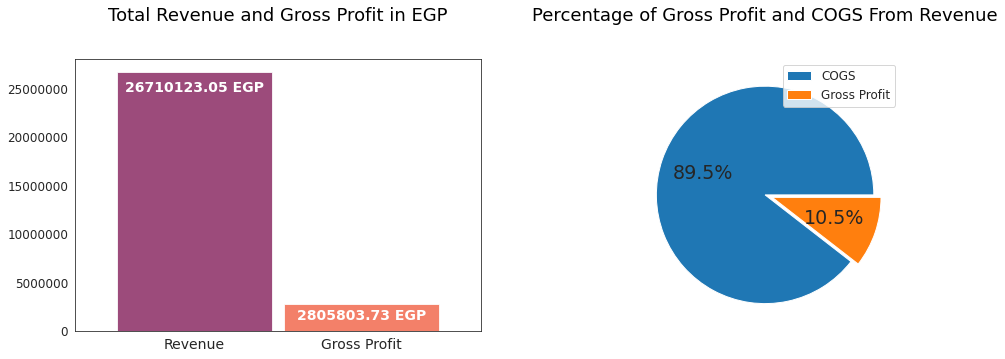

In [700]:
# Plot revenue and profit

sns.set_style("white")

c = sns.color_palette("rocket", 2)

fig, ax = plt.subplots(1,2, figsize=(16,5), sharex=False)

fig.set_size_inches(16,5)
ax[1].pie(pro_cosd, autopct='%1.1f%%', textprops={'fontsize': 19},explode = (0, 0.07,))
plt.rcParams['font.size'] = 12

ax[1].set_title("Percentage of Gross Profit and COGS From Revenue",fontsize=18, pad=38, color="k")
ax[1].legend(fontsize=12, labels=[ "COGS","Gross Profit"]);


total_sales.plot(kind="bar",
                    rot = 0,
                    width = 0.93,
                    alpha = 0.8,
                    fontsize = 12,
                    color=c, ax=ax[0])



ax[0].set_title("Total Revenue and Gross Profit in EGP", fontsize=18, color="k", pad=38)
ax[0].set_xticklabels( labels=["Revenue", "Gross Profit"], fontsize=14)

ax[0].text(0,25090000,str(round(rev, 2))+" EGP", color='white', fontweight='bold', fontsize=14, ha='center', va='center')
ax[0].text(1,1500000,str(round(prof, 2))+" EGP", color='white', fontweight='bold', fontsize=14, ha='center', va='center')
ax[0].ticklabel_format(axis="y", style='plain');


In [702]:
cogs + prof == rev

True

In [703]:
prof

2805803.7327065896

In [704]:
rev

26710123.04976

In [706]:
cogs

23904319.317053407

### Answer 1

**The total Revenue is: 26710123.05 EGP.**

**The Gross Profit is:  2805803.73 EGP.**

**The COGS is: 23904319.32 EGP.**

**The Gross Profit is: 10.5% from total Revenue.**

**The COGS is: 89.5% from total Revenue.**


### Check Distribution and Five number summary for Sales_Price, Cost, Quantity and Profit.

In [123]:
#Selec quantitative Variables to plot them

quantitative =  ["Revenue", "Cost", "Quantity", "Profit"]

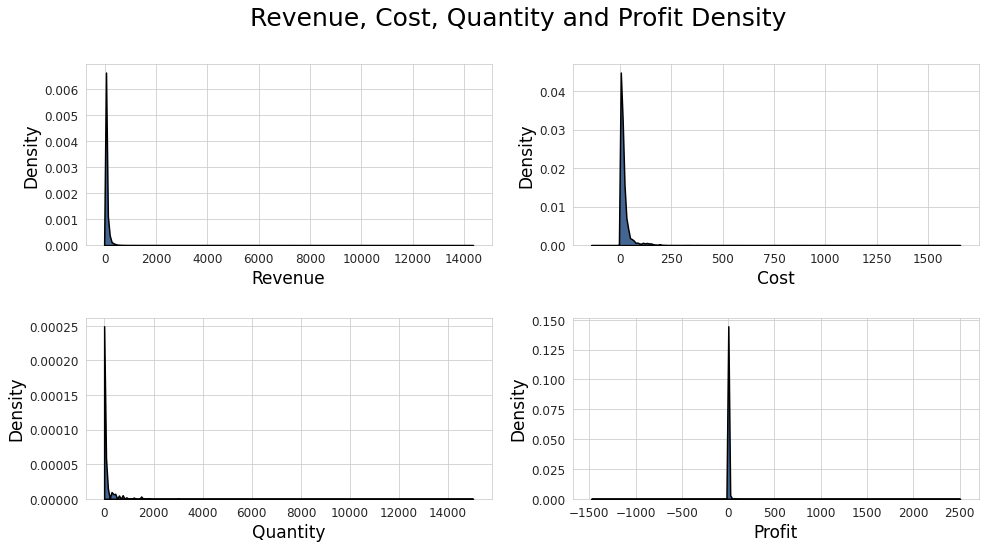

In [153]:
# Quantitative Variables Density plots
sns.set_style("whitegrid")

fig,ax = plt.subplots(2,2,figsize=(16,8))
k=0
j=0
for col in quantitative:
    sns.kdeplot(sales[col], ax=ax[k,j],
                shade=True,
                color='#2f5586', edgecolor='black',
                linewidth=1.5, alpha=0.9,
                zorder=3,
               )
    
    ax[k,j].set_xlabel(col, fontsize=17, color="k")
    ax[k,j].set_ylabel("Density", fontsize=17, color="k")
    if j>=1:
        k+=1
        j=-1
    j+=1
plt.subplots_adjust(hspace = 0.4, wspace=0.2)
fig.suptitle('Revenue, Cost, Quantity and Profit Density', fontsize=25, color="k");

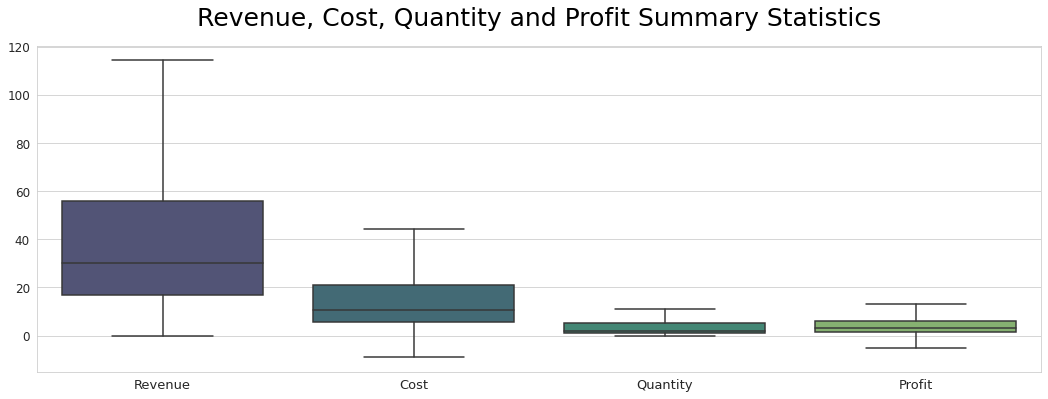

In [154]:
# Quantitative Variables Boxplots

fig = plt.figure(figsize=(18,6))
sns.boxplot(data=sales[quantitative],saturation=.5, palette="viridis", showfliers = False)
plt.title("Revenue, Cost, Quantity and Profit Summary Statistics", fontsize=25, color="k", pad=20)
plt.xticks(fontsize= 13);

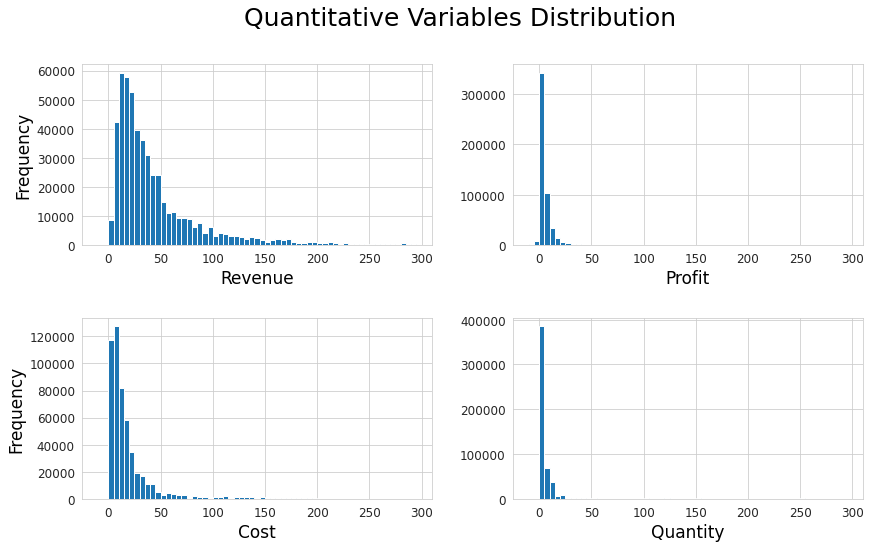

In [150]:
# Quantitative Variables Distributions

fig,ax = plt.subplots(2,2,figsize=(14,8))
bins = np.arange(-10, 300, 5)

ax[0,0].hist(x = sales.Revenue,  bins=bins);
ax[0,1].hist(x = sales.Profit,  bins=bins);
ax[1,0].hist(x = sales.Cost,  bins=bins);
ax[1,1].hist(x = sales.Quantity,  bins=bins);

ax[0,0].set_xlabel("Revenue", fontsize=17, color="k")
ax[0,0].set_ylabel("Frequency", fontsize=17, color="k")

ax[0,1].set_xlabel("Profit", fontsize=17, color="k")
#ax[0,1].set_ylabel("Frequency", fontsize=17, color="k")

ax[1,0].set_xlabel("Cost", fontsize=17, color="k")
ax[1,0].set_ylabel("Frequency", fontsize=17, color="k")

ax[1,1].set_xlabel("Quantity", fontsize=17, color="k")
#ax[1,1].set_ylabel("Frequency", fontsize=17, color="k")

plt.subplots_adjust(hspace = 0.4, wspace=0.23)
fig.suptitle('Quantitative Variables Distribution', fontsize=25, color="k");

**From above visualization we can see that:**

**- There are approximate 60000 observation have Revenue less than 15 EGP.**

**- There are approximate 118000 observation have Cost 5 EGP or less.**
    
**- Revenue, Profit, Quantity and Cost have a right skewed distribution that means:**
      
> The observation with small amounts of (Revenue, Profit, Quantity and Cost) are the most frequant (less than 50 EGP).

> The observation with large amounts of (Revenue, Profit, Quantity and Cost) are the least frequant (more than 50 EGP).

In [155]:
# Import libraries for fix arabic titles in charts

import arabic_reshaper as r
from bidi.algorithm import get_display

### Research Question 2
> ####    What are the highest revenue, most sold and most profitable Products?      (top 10)


In [710]:
# Best sales products

b_sales_products = sales.groupby("Product").Revenue.sum().sort_values(ascending=False).iloc[:10]
b_sales_products = b_sales_products.sort_values(ascending=True)
b_sales_products.to_frame()

,Revenue
Product,
بامبرز كبيرمقاس 4 /58قطعة,161407.20
سندريلا كبير /موف40قطعة,175705.44
اولويز ليلي (طويل جدا 10)%خصم16ق,180000.14
سرنجات ماسكو 3سم كبار /150سرنجه لوك,187333.69
مناديل زينه 550 سعر جديد,198361.25
حفاضات دراي بلس كبار سن /36قطعه سعر جديد,211873.30
بامبرز كبير جدا مقاس58/5قطعه,220990.20
سرنجات ماسكو 5سم /120سرنجه,223014.04
اولويز دوبل ليلي 10%خصم16ق,284097.89


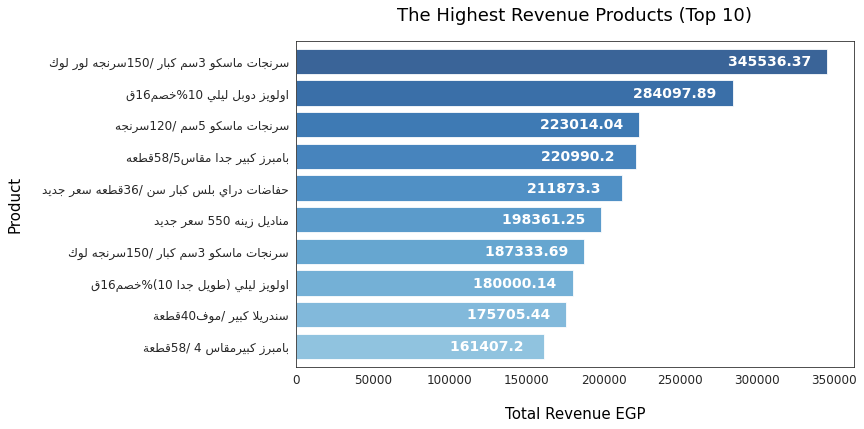

In [711]:
# Best sales Productcs bar chart

c = sns.color_palette("Blues", 18)[8:]

b_sales_products.plot(kind="barh",
                    rot = 0,
                    width = 0.8,
                    alpha = 0.8,
                    fontsize = 12,
                    color=c,
                    figsize=(10,6))
                
ylbl = [get_display(r.reshape(label)) for label in b_sales_products.index]

for i, v in enumerate(b_sales_products):
    plt.text(v-36000 , i-.01, str(round(v, 2))+" ", color='white', fontweight='bold', fontsize=14, ha='center', va='center')

plt.ylabel("Product",fontsize=15, color="k", labelpad=20, ha="center")
plt.xlabel("Total Revenue EGP",fontsize=15, color="k", labelpad=20, ha="center")
plt.title("The Highest Revenue Products (Top 10)", fontsize=18, color="k", pad=20);
plt.yticks(range(len(ylbl)), ylbl, fontsize=12);

In [712]:
# most sold products

m_sold_products = sales.groupby("Product").Quantity.sum().sort_values(ascending=False).iloc[:10]
m_sold_products = m_sold_products.sort_values(ascending=True)
m_sold_products.to_frame()

,Quantity
Product,
سرنجات الدوليه 3سم اطفال /250سرنجه,55000.0
سرنجات ماسكو انسولين (250سرنجه) /100 وحده,88448.0
سرنجات الدوليه 5سم /200 سرنجه,93424.0
سرنجات ماسكو3سم اطفال/150سرنجه لور لوك,112650.0
سرنجات كوري انسولين /10سرنجه,127384.0
سرنجات ماسكو 3سم اطفال/150سرنجه لوك,146400.0
سرنجات الدوليه 3سم كبار/250سرنجة,262341.0
سرنجات ماسكو 3سم كبار /150سرنجه لوك,287100.0
سرنجات ماسكو 5سم /120سرنجه,290700.0


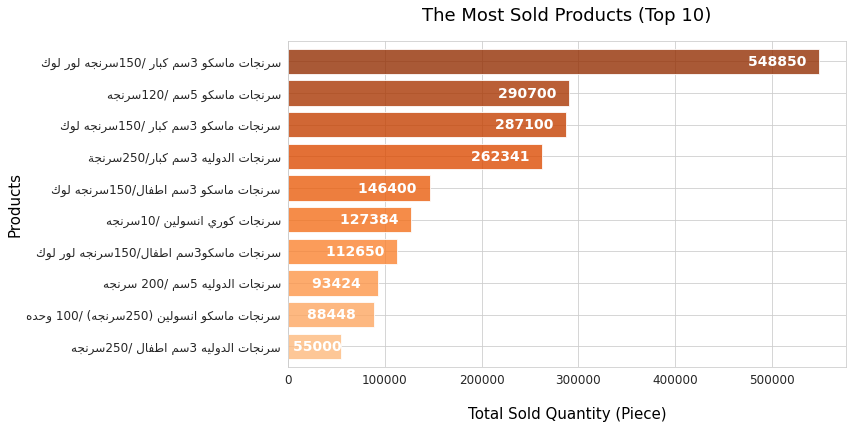

In [437]:
# The Most Sold Products bar chart

c = sns.color_palette("Oranges", 14)[4:]



m_sold_products.plot(kind="barh",
                    rot = 0,
                    width = 0.8,
                    alpha = 0.8,
                    fontsize = 12,
                    color=c,
                    figsize=(10,6))
                
ylbl = [get_display(r.reshape(label)) for label in m_sold_products.index]

for i, v in enumerate(m_sold_products):
    if i !=0:
        plt.text(v-40900 , i-.01, str(round(v))+" ", color='white', fontweight='bold', fontsize=14, ha='center', va='center')
    else:
        plt.text(v-22000 , i-.01, str(round(v))+" ", color='white', fontweight='bold', fontsize=14, ha='center', va='center')


plt.ylabel("Products",fontsize=15, color="k")
plt.xlabel("Total Sold Quantity (Piece)",fontsize=15, color="k", labelpad=20, ha="center")
plt.title("The Most Sold Products (Top 10)", fontsize=18, color="k", pad=20);
plt.yticks(range(len(ylbl)), ylbl, fontsize=12);

In [713]:
# Most profitable products

m_profitable_products = sales.groupby("Product").Profit.sum().sort_values(ascending=False).iloc[:10]
m_profitable_products = m_profitable_products.sort_values(ascending=True)
m_profitable_products.to_frame()

,Profit
Product,
سندريلا كبير /موف40قطعة,13053.06580
شريط تحليل فاست بيبي تشيك /جهاز,14858.08460
جيليت ماكينه حلاقه /حريمي,15859.54688
دريسينج تراي ام 15*25 /10 ق,16074.11100
لاصق فئران كتاب /صغير,16997.61700
1-2-3 فرشة اسنان اورال بي,18752.33000
مناديل زينه 550 سعر جديد,19513.60650
100 /سرنجات دواء اطفال بابلز 5سم,20568.29917
كاندم عازل صيني (سوترا) 24قطعه,25897.91043


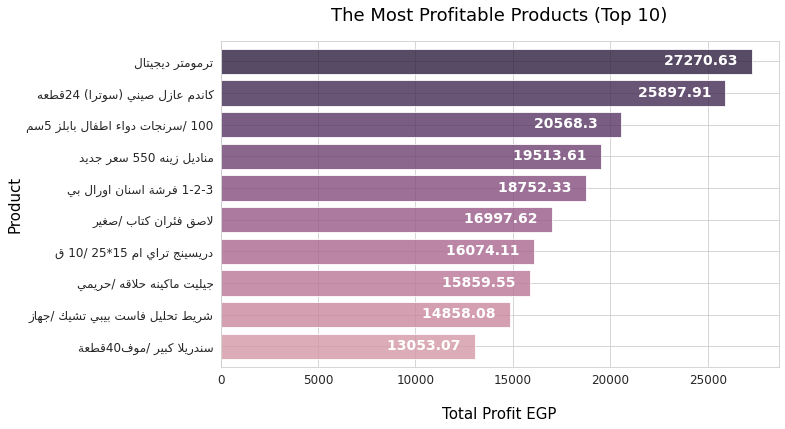

In [441]:
# The most profitable products chart bar chart

c = sns.cubehelix_palette(13)[3:]

m_profitable_products.plot(kind="barh",
                    rot = 0,
                    width = 0.8,
                    alpha = 0.8,
                    fontsize = 12,
                    color=c,
                    figsize=(10,6))
                
ylbl = [get_display(r.reshape(label)) for label in m_profitable_products.index]


for i, v in enumerate(m_profitable_products):
    plt.text(v-4500 , i-.1, str(round(v, 2))+" ", color='white', fontweight='bold', fontsize=14)#, ha='center', va='center')

plt.ylabel("Product",fontsize=15, color="k", ha="center")
plt.xlabel("Total Profit EGP",fontsize=15, color="k", labelpad=20, ha="center")
plt.title("The Most Profitable Products (Top 10)", fontsize=18, color="k", pad=20);
plt.yticks(range(len(ylbl)), ylbl, fontsize=12);

### Answer 2

**From above visualisation we can conclude:**

   -  The Highest Revenue Products are: 
   
           1. سرنجات ماسكو 5سم /120سرنجه 
           2. اولويز دوبل ليلي 10%خصم16ق                  
           3. سرنجات ماسكو 3سم كبار /150سرنجه لور لوك    

   -  The Most Sold Products are: 
   
           1. سرنجات ماسكو 3سم كبار /150سرنجه لوك
           2. سرنجات ماسكو 5سم /120سرنجه
           3. سرنجات ماسكو 3سم كبار /150سرنجه لور لوك     

   -  The  Most Profitable Products are: 
   
           1. ترمومتر ديجيتال
           2. كاندم عازل صيني (سوترا) 24قطعه
           3. سرنجات دواء اطفال بابلز 5سم

### Research Question 3
> #### What is the highest revenue, most selling and most profitable Category?

In [714]:
# Best sales category

b_sales_category = sales.groupby("Category").Revenue.sum().sort_values(ascending=False).iloc[:10]
b_sales_category = b_sales_category.sort_values(ascending=True)
b_sales_category.to_frame()

,Revenue
Category,
سيرم للبشرة,1.015994e+04
Unknown,3.320207e+04
ورقيات,5.138835e+06
مستلزمات,6.883402e+06
اكسسوار,1.464452e+07


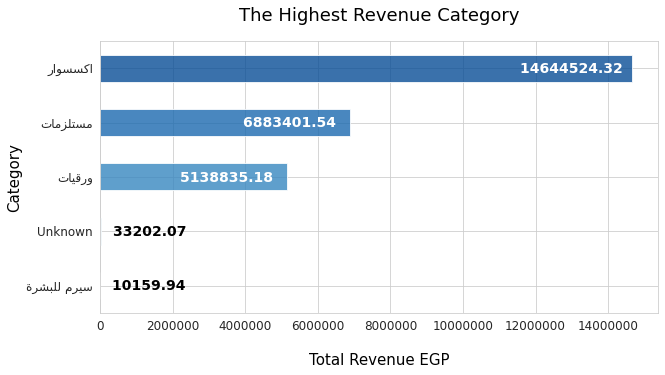

In [443]:
# Best sales Category bar chart

c = sns.color_palette("Blues", 8)[3:]

b_sales_category.plot(kind="barh",
                    rot = 0,
                    width = 0.5,
                    alpha = 0.8,
                    fontsize = 12,
                    color=c,
                    figsize=(10,5))
                
ylbl = [get_display(r.reshape(label)) for label in b_sales_category.index]


for i, v in enumerate(b_sales_category):
    if i <2:
        plt.text(v+1400000 , i-.01, str(round(v, 2))+" ", color='black', fontweight='bold', fontsize=14, ha='center', va='center')
    else:
        plt.text(v-1600000, i-.01, str(round(v, 2))+" ", color='white', fontweight='bold', fontsize=14, ha='center', va='center')

    
plt.ylabel("Category",fontsize=15, color="k")
plt.xlabel("Total Revenue EGP",fontsize=15, color="k", labelpad=20, ha="center")
plt.title("The Highest Revenue Category", fontsize=18, color="k", pad=20);
plt.yticks(range(len(ylbl)), ylbl, fontsize=12)
plt.ticklabel_format(axis="x", style='plain');

### Unknown is for sum of Revenue for all categories with empty values.

In [715]:
# most sold category

m_sold_category = sales.groupby("Category").Quantity.sum().sort_values(ascending=False).iloc[:10]
m_sold_category = m_sold_category.sort_values(ascending=True)
m_sold_category.to_frame()

,Quantity
Category,
سيرم للبشرة,109.00
Unknown,1904.00
ورقيات,346927.00
اكسسوار,1062978.00
مستلزمات,2926029.56


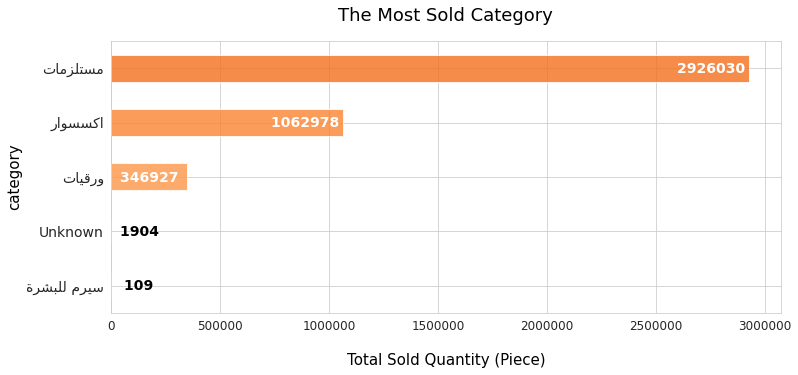

In [339]:
# The Most Sold category bar chart

c = sns.color_palette("Oranges", 14)[4:]



m_sold_category.plot(kind="barh",
                    rot = 0,
                    width = 0.5,
                    alpha = 0.8,
                    fontsize = 12,
                    color=c,
                    figsize=(12,5))
                
ylbl = [get_display(r.reshape(label)) for label in m_sold_category.index]


for i, v in enumerate(m_sold_category):
    if i >1:
        plt.text(v-159900 , i-.01, str(round(v))+" ", color='white', fontweight='bold', fontsize=14, ha='center', va='center')
    else:
        plt.text(v+139000 , i-.01, str(round(v))+" ", color='black', fontweight='bold', fontsize=14, ha='center', va='center')
 

plt.ylabel("category",fontsize=15, color="k")
plt.xlabel("Total Sold Quantity (Piece)",fontsize=15, color="k", labelpad=20, ha="center")
plt.title("The Most Sold Category", fontsize=18, color="k", pad=20);
plt.yticks(range(len(ylbl)), ylbl, fontsize=14)
plt.ticklabel_format(axis="x", style='plain');

### Unknown is for sum of Quantiity for all categories with empty values.

In [716]:
# Most profitable category

m_profitable_category = sales.groupby("Category").Profit.sum().sort_values(ascending=False).iloc[:10]
m_profitable_category = m_profitable_category.sort_values(ascending=True)
m_profitable_category.to_frame()

,Profit
Category,
سيرم للبشرة,1.809040e+03
Unknown,4.332508e+03
ورقيات,3.787671e+05
مستلزمات,8.175149e+05
اكسسوار,1.603380e+06


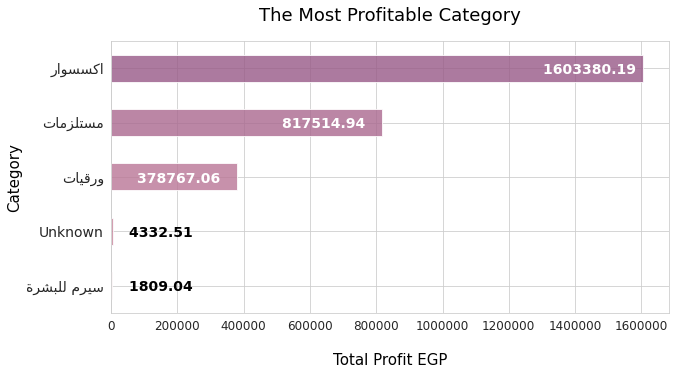

In [448]:
# The most profitable category chart

c = sns.cubehelix_palette(13)[3:]

m_profitable_category.plot(kind="barh",
                    rot = 0,
                    width = 0.5,
                    alpha = 0.8,
                    fontsize = 12,
                    color=c,
                    figsize=(10,5))
                
ylbl = [get_display(r.reshape(label)) for label in m_profitable_category.index]

for i, v in enumerate(m_profitable_category):
    if i <2:
        plt.text(v+50900 , i-.1, str(round(v, 2))+" ", color='black', fontweight='bold', fontsize=14)#, ha='center', va='center')
    else:
        plt.text(v-300900 , i-.1, str(round(v, 2))+" ", color='white', fontweight='bold', fontsize=14)#, ha='center', va='center')
plt.ylabel("Category",fontsize=15, color="k")
plt.xlabel("Total Profit EGP",fontsize=15, color="k", labelpad=20, ha="center")
plt.title("The Most Profitable Category", fontsize=18, color="k", pad=20);
plt.yticks(range(len(ylbl)), ylbl, fontsize=14)
plt.ticklabel_format(axis="x", style='plain');

### Unknown is for sum of Profit for all categories with empty values.

### Answer 3


**From above visualisation we can conclude:**

   -  The Highest Revenue Categories are: 
   
           1. اكسسوار
           2. مستلزمات
           3. ورقيات
           
   -  The Most Sold Categories are: 
   
           1. مستلزمات
           2. اكسسوار
           3. ورقيات
   
   
   -  The  Most Profitable Categories are: 
   
           1. اكسسوار
           2. مستلزمات
           3. ورقيات

### Research Question 4

> #### What are the highest revenue, most selling and most profitable Subcategories? (top 10)

In [717]:
# Best sales subcategory

b_sales_subcategory = sales.groupby("Subcategory").Revenue.sum().sort_values(ascending=False).iloc[:10]
b_sales_subcategory = b_sales_subcategory.sort_values(ascending=True)
b_sales_subcategory.to_frame()

,Revenue
Subcategory,
كريم شعر,913193.52
مبيدات,931970.08
مزيل عرق,969997.60
زيت شعر,1138076.02
شامبو,1289660.28
معجون اسنان,1480805.32
سرنجات,1513425.53
Unknown,1995599.73
حفاضات,2224346.39


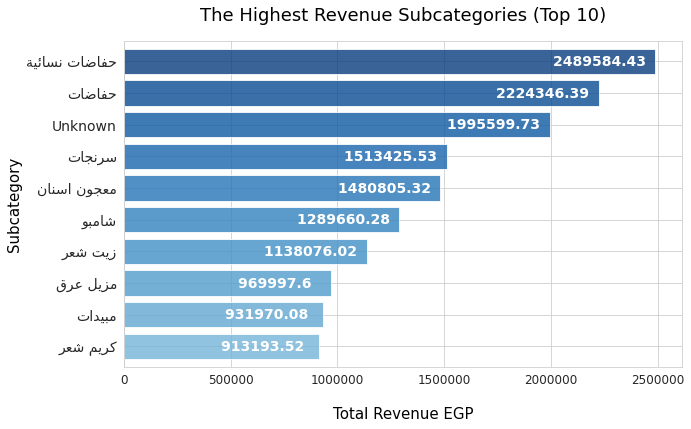

In [451]:
# Best sales subcategory bar chart

c = sns.color_palette("Blues", 18)[8:]

b_sales_subcategory.plot(kind="barh",
                    rot = 0,
                    width = 0.8,
                    alpha = 0.8,
                    fontsize = 12,
                    color=c,
                    figsize=(10,6))
                
ylbl = [get_display(r.reshape(label)) for label in b_sales_subcategory.index]

for i, v in enumerate(b_sales_subcategory):
    plt.text(v-250990 , i-.01, str(round(v, 2))+" ", color='white', fontweight='bold', fontsize=14, ha='center', va='center')

    
plt.ylabel("Subcategory",fontsize=15, color="k")
plt.xlabel("Total Revenue EGP",fontsize=15, color="k", labelpad=20, ha="center")
plt.title("The Highest Revenue Subcategories (Top 10)", fontsize=18, color="k", pad=20)
plt.yticks(range(len(ylbl)), ylbl, fontsize=14)
plt.ticklabel_format(axis="x", style='plain');

### Unknown is for sum of Revenue for all subcategories with empty values.

In [718]:
# most sold subcategory

m_sold_subcategory = sales.groupby("Subcategory").Quantity.sum().sort_values(ascending=False).iloc[:10]
m_sold_subcategory = m_sold_subcategory.sort_values(ascending=True)
m_sold_subcategory.to_frame()

,Quantity
Subcategory,
زيت شعر,71201.0
تركيبات,87509.0
شاش,93605.0
ازالة شعر,101950.0
دريسينج,125246.0
مناديل,131916.0
معجون اسنان,133881.0
Unknown,158970.0
حفاضات نسائية,192427.0


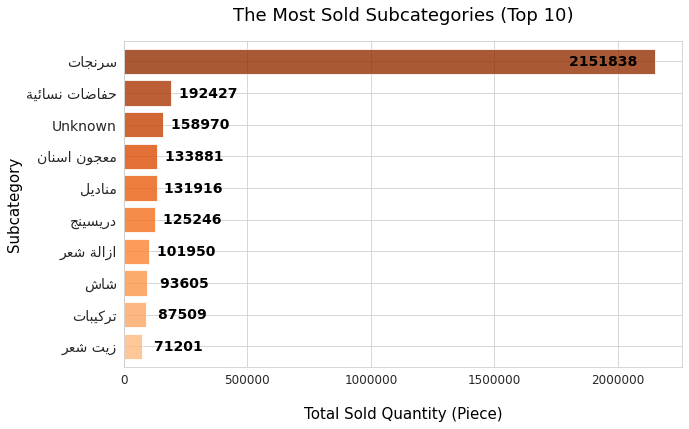

In [454]:
# The Most Sold subcategory bar chart

c = sns.color_palette("Oranges", 14)[4:]



m_sold_subcategory.plot(kind="barh",
                    rot = 0,
                    width = 0.8,
                    alpha = 0.8,
                    fontsize = 12,
                    color=c,
                    figsize=(10,6))
                
ylbl = [get_display(r.reshape(label)) for label in m_sold_subcategory.index]

for i, v in enumerate(m_sold_subcategory):
    if i !=9:
        plt.text(v+159200 , i-.01, str(round(v))+" ", color='black', fontweight='bold', fontsize=14, ha='center', va='center')
    else:
        plt.text(v-200000 , i-.01, str(round(v))+" ", color='black', fontweight='bold', fontsize=14, ha='center', va='center')


plt.ylabel("Subcategory",fontsize=15, color="k")
plt.xlabel("Total Sold Quantity (Piece)",fontsize=15, color="k", labelpad=20, ha="center")
plt.title("The Most Sold Subcategories (Top 10)", fontsize=18, color="k", pad=20);
plt.yticks(range(len(ylbl)), ylbl, fontsize=14)
plt.ticklabel_format(axis="x", style='plain');

### Unknown is for sum of Quantities for all subcategories with empty values.

In [719]:
# Most profitable subcategory

m_profitable_subcategory = sales.groupby("Subcategory").Profit.sum().sort_values(ascending=False).iloc[1:11]
m_profitable_subcategory = m_profitable_subcategory.sort_values(ascending=True)
m_profitable_subcategory.to_frame()

,Profit
Subcategory,
كريم شعر,85862.755533
مبيدات,90112.335339
تركيبات,90190.613972
ازالة شعر,94542.847391
زيت شعر,94724.964893
مزيل عرق,106529.472206
شامبو,120408.626247
حفاضات,123588.277729
معجون اسنان,132788.208162


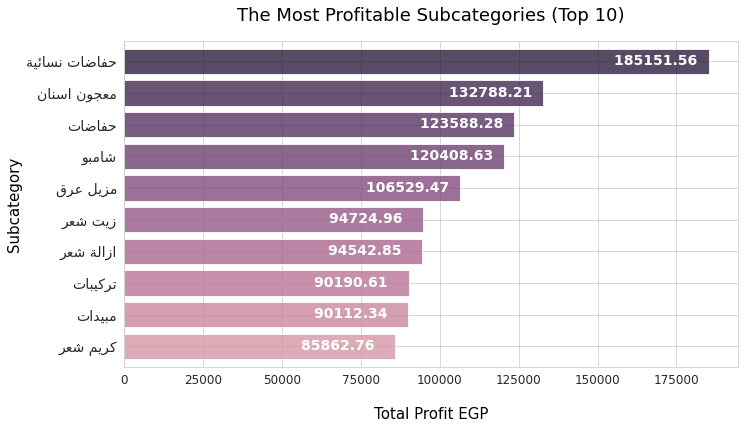

In [458]:
# The most profitable subcategory chart

c = sns.cubehelix_palette(13)[3:]

m_profitable_subcategory.plot(kind="barh",
                    rot = 0,
                    width = 0.8,
                    alpha = 0.8,
                    fontsize = 12,
                    color=c,
                    figsize=(11,6))
                
ylbl = [get_display(r.reshape(label)) for label in m_profitable_subcategory.index]

for i, v in enumerate(m_profitable_subcategory):

    plt.text(v- 29900 , i-.1, str(round(v, 2))+" ", color='white', fontweight='bold', fontsize=14)#, ha='center', va='center')
plt.ylabel("Subcategory",fontsize=15, color="k")
plt.xlabel("Total Profit EGP",fontsize=15, color="k", labelpad=20, ha="center")
plt.title("The Most Profitable Subcategories (Top 10)", fontsize=18, color="k", pad=20);
plt.yticks(range(len(ylbl)), ylbl, fontsize=14);

### Unknown is for sum of Profit for all subcategories with empty values.

### Answer 4

**From above visualisation we can conclude:**

   -  The Highest Revenue Subategories are: 
   
           1. حفاضات نسائية
           2. حفاضات
           3. سرنجات
           
   -  The Most Sold Subategories are: 
   
           1. سرنجات
           2. حفاضات نسائية
           3. معجون اسنان
   
   
   -  The  Most Profitable Subategories are: 
   
           1. حفاضات نسائية
           2. معجون اسنان
           3. حفاضات

### Research Question 5

> #### What are the highest revenue, most selling and most profitable Regions?       (top 10)

In [720]:
# Best sales region

b_sales_region = sales.groupby("Region_Id").Revenue.sum().sort_values(ascending=False).iloc[1:11]
b_sales_region = b_sales_region.sort_values(ascending=True)
b_sales_region.to_frame()

,Revenue
Region_Id,
Region1-43,787723.52
Region11097,800962.08
Region133,860533.95
Region1831,861834.30
Region1584,867944.73
Region11059,929311.31
Region171,952347.38
Region1-62,1019073.08
Region1-24,1043745.23


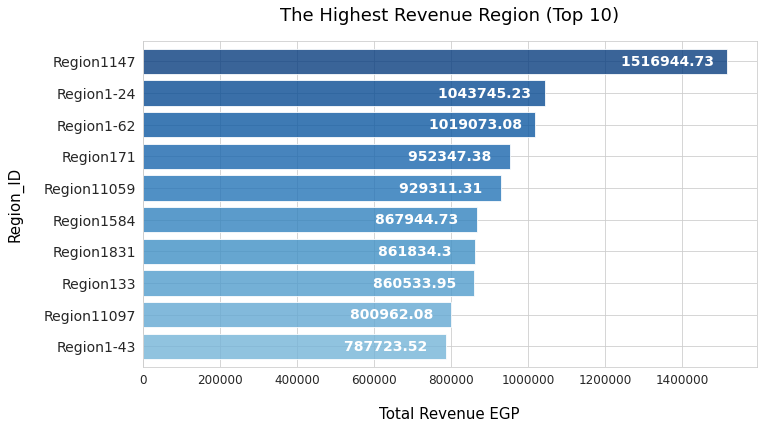

In [461]:
# Best sales Region bar chart

c = sns.color_palette("Blues", 18)[8:]

b_sales_region.plot(kind="barh",
                    rot = 0,
                    width = 0.8,
                    alpha = 0.8,
                    fontsize = 12,
                    color=c,
                    figsize=(11,6))
                
ylbl = [get_display(r.reshape(label)) for label in b_sales_region.index]

for i, v in enumerate(b_sales_region):
    plt.text(v-150000 , i-.01, str(round(v, 2))+" ", color='white', fontweight='bold', fontsize=14, ha='center', va='center')

plt.ylabel("Region_ID",fontsize=15, color="k", labelpad=20, ha="center")
plt.xlabel("Total Revenue EGP",fontsize=15, color="k", labelpad=20, ha="center")
plt.title("The Highest Revenue Region (Top 10)", fontsize=18, color="k", pad=20);
plt.yticks(range(len(ylbl)), ylbl, fontsize=14)
plt.ticklabel_format(axis="x", style='plain');

In [721]:
# most sold region

m_sold_region = sales.groupby("Region_Id").Quantity.sum().sort_values(ascending=False).iloc[:10]
m_sold_region = m_sold_region.sort_values(ascending=True)
m_sold_region.to_frame()

,Quantity
Region_Id,
Region1-43,131404.00
Region1831,134787.75
Region1375,135808.25
Region1-62,146037.75
Region133,155848.25
Region11097,181775.85
Unknown,188763.41
Region171,190833.25
Region1147,210067.55


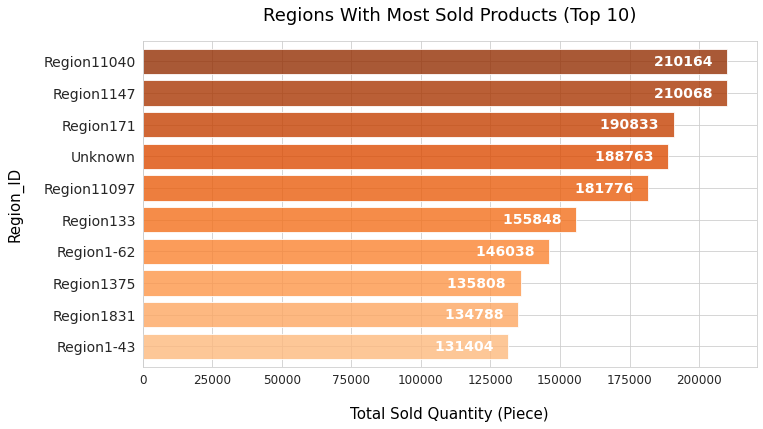

In [466]:
# The Most Sold regions Bar chart

c = sns.color_palette("Oranges", 14)[4:]



m_sold_region.plot(kind="barh",
                    rot = 0,
                    width = 0.8,
                    alpha = 0.8,
                    fontsize = 12,
                    color=c,
                    figsize=(11,6))
                
ylbl = [get_display(r.reshape(label)) for label in m_sold_region.index]

for i, v in enumerate(m_sold_region):
    if i !=0:
        plt.text(v-14900 , i-.01, str(round(v))+" ", color='white', fontweight='bold', fontsize=14, ha='center', va='center')
    else:
        plt.text(v-14900 , i-.01, str(round(v))+" ", color='white', fontweight='bold', fontsize=14, ha='center', va='center')
 

plt.ylabel("Region_ID",fontsize=15, color="k", labelpad=20, ha="center")
plt.xlabel("Total Sold Quantity (Piece)",fontsize=15, color="k", labelpad=20, ha="center")
plt.title("Regions With Most Sold Products (Top 10)", fontsize=18, color="k", pad=20);
plt.yticks(range(len(ylbl)), ylbl, fontsize=14);

### Unknown is for sum of Quantity for all Regions with empty values.

In [722]:
# Most profitable region

m_profitable_region = sales.groupby("Region_Id").Profit.sum().sort_values(ascending=False).iloc[:10]
m_profitable_region = m_profitable_region.sort_values(ascending=True)
m_profitable_region.to_frame()

,Profit
Region_Id,
Region1-43,87377.416960
Region11059,88254.399525
Region1584,94091.751911
Region133,94114.625035
Region1831,95178.180609
Unknown,96368.456836
Region171,100646.353650
Region1-62,111217.576151
Region1-24,116996.956957


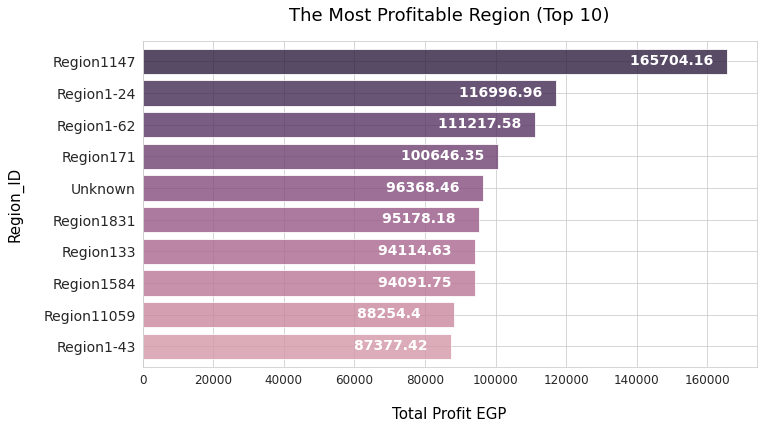

In [470]:
# The most profitable region chart

c = sns.cubehelix_palette(13)[3:]

m_profitable_region.plot(kind="barh",
                    rot = 0,
                    width = 0.8,
                    alpha = 0.8,
                    fontsize = 12,
                    color=c,
                    figsize=(11,6))
                
ylbl = [get_display(r.reshape(label)) for label in m_profitable_region.index]

for i, v in enumerate(m_profitable_region):
    plt.text(v-27500 , i-.1, str(round(v, 2))+" ", color='white', fontweight='bold', fontsize=14)#, ha='center', va='center')

plt.ylabel("Region_ID",fontsize=15, color="k", labelpad=20, ha="center")
plt.xlabel("Total Profit EGP",fontsize=15, color="k", labelpad=20, ha="center")
plt.title("The Most Profitable Region (Top 10)", fontsize=18, color="k", pad=20);
plt.yticks(range(len(ylbl)), ylbl, fontsize=14);

### Unknown is for sum of profit for all Regions with empty values.

### Answer 5

**From above visualisation we can conclude:**

   -  The Regions With Highest Revenue are: 
   
           1. Region1147
           2. Region1-24
           3. Region1-62
           
   -  The Regions With Most Sold Products are: 
   
           1. Region11040
           2. Region1147
           3. Region171
           
   -  The Most Profitable Regions are: 
   
           1. Region1-62
           2. Region1-24
           3. Region1147
           

### Research Question 6

> #### What are the highest revenue and profit generating Manufacturers? (top 10)

In [723]:
# Best sales manufacturers

b_sales_manufacturers = sales.groupby("Manufacturer").Revenue.sum().sort_values(ascending=False).iloc[:10]
b_sales_manufacturers = b_sales_manufacturers.sort_values(ascending=True)
b_sales_manufacturers.to_frame()

,Revenue
Manufacturer,
مولفكس,6.290767e+05
جونسون,8.638751e+05
فاتيكا,8.956631e+05
اجهزة ومشتملاتها,1.002317e+06
مستورد,1.153952e+06
ماسكو,1.316648e+06
ايفا,1.567116e+06
ليفر,2.101216e+06
بروكتر,3.282411e+06


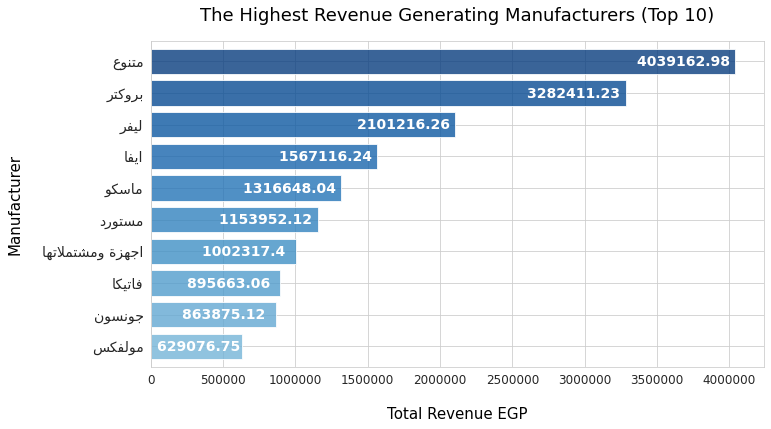

In [481]:
# Best sales manufacturers bar chart

c = sns.color_palette("Blues", 18)[8:]

b_sales_manufacturers.plot(kind="barh",
                    rot = 0,
                    width = 0.8,
                    alpha = 0.8,
                    fontsize = 12,
                    color=c,
                    figsize=(11,6))
                
ylbl = [get_display(r.reshape(label)) for label in b_sales_manufacturers.index]

for i, v in enumerate(b_sales_manufacturers):
    if i !=0:
        plt.text(v-340000 , i-.01, str(round(v, 2))+" ", color='white', fontweight='bold', fontsize=14, ha='center', va='center')
    else:
        plt.text(v-280000 , i-.01, str(round(v, 2))+" ", color='white', fontweight='bold', fontsize=14, ha='center', va='center')
       
plt.ylabel("Manufacturer",fontsize=15, color="k", labelpad=20, ha="center")
plt.xlabel("Total Revenue EGP",fontsize=15, color="k", labelpad=20, ha="center")
plt.title("The Highest Revenue Generating Manufacturers (Top 10)", fontsize=18, color="k", pad=20);
plt.yticks(range(len(ylbl)), ylbl, fontsize=14)
plt.ticklabel_format(axis="x", style='plain');

In [724]:
# Most profitable manufacturers

m_profitable_manufacturers = sales.groupby("Manufacturer").Profit.sum().sort_values(ascending=False).iloc[:10]
m_profitable_manufacturers = m_profitable_manufacturers.sort_values(ascending=True)
m_profitable_manufacturers.to_frame()

,Profit
Manufacturer,
مستلزمات اطفال,69689.961240
مستورد,79370.836417
هنكل,86008.616880
جونسون,90522.254271
فاتيكا,94994.029319
اجهزة ومشتملاتها,119578.077620
ايفا,153427.951285
ليفر,185988.909234
بروكتر,232293.319429


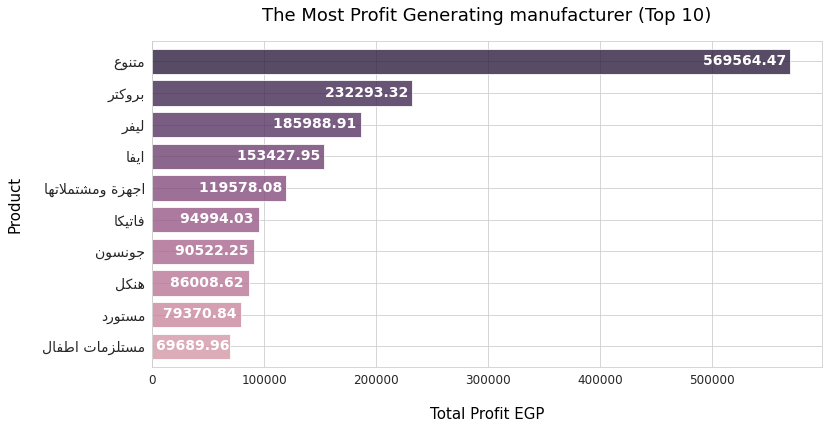

In [482]:
# The most profitable manufacturer chart

c = sns.cubehelix_palette(13)[3:]

m_profitable_manufacturers.plot(kind="barh",
                    rot = 0,
                    width = 0.8,
                    alpha = 0.8,
                    fontsize = 12,
                    color=c,
                    figsize=(12,6))
                
ylbl = [get_display(r.reshape(label)) for label in m_profitable_manufacturers.index]


for i, v in enumerate(m_profitable_manufacturers):
    if i >4:
        plt.text(v-78000 , i-.1, str(round(v, 2))+" ", color='white', fontweight='bold', fontsize=14)#, ha='center', va='center')
    elif i ==0:
        plt.text(v-66000 , i-.1, str(round(v, 2))+" ", color='white', fontweight='bold', fontsize=14)#, ha='center', va='center')
    else:
        plt.text(v-70000 , i-.1, str(round(v, 2))+" ", color='white', fontweight='bold', fontsize=14)#, ha='center', va='center')

plt.ylabel("Product",fontsize=15, color="k", labelpad=20, ha="center")
plt.xlabel("Total Profit EGP",fontsize=15, color="k", labelpad=20, ha="center")
plt.title("The Most Profit Generating manufacturer (Top 10)", fontsize=18, color="k", pad=20);
plt.yticks(range(len(ylbl)), ylbl, fontsize=14);

### Answer 6


**From above visualisation we can conclude:**

   - . The Highest Revenue Generating Manufacturers are: 
   
           - متنوع
           - بروكتر
           - ليفر
           - ايفا
   - . The Most Profit Generating manufacturer are: 
   
           - متنوع
           - بروكتر
           - ليفر
           - ايفا

### Research Question 7

> #### What are the highest revenue and profit generating Client? (top 10)

In [725]:
# Best sales Clients

b_sales_customer = sales.groupby("Customer_Id").Revenue.sum().sort_values(ascending=False).iloc[:10]
b_sales_customer = b_sales_customer.sort_values(ascending=True)
b_sales_customer.to_frame()

,Revenue
Customer_Id,
847,341075.78
155,346260.10
178,367097.59
1619,388952.19
1291,448420.53
2057,529975.59
451,542036.95
2072,593149.47
2398,720547.24


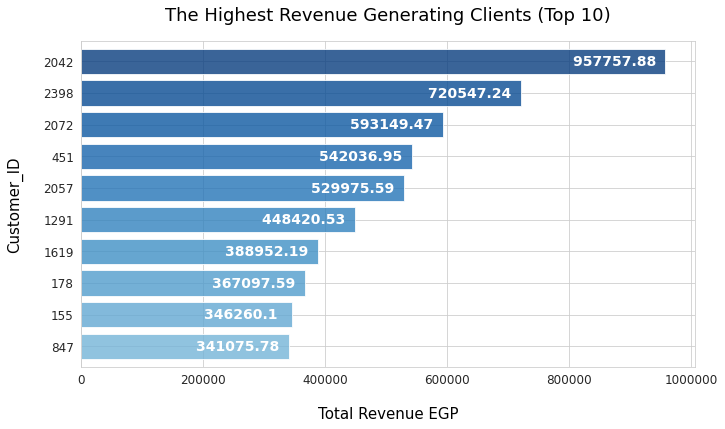

In [490]:
# Best sales Clients bar chart

c = sns.color_palette("Blues", 18)[8:]

b_sales_customer.plot(kind="barh",
                    rot = 0,
                    width = 0.8,
                    alpha = 0.8,
                    fontsize = 12,
                    color=c,
                    figsize=(11,6))
                


for i, v in enumerate(b_sales_customer):
    plt.text(v-80000 , i-.01, str(round(v, 2))+" ", color='white', fontweight='bold', fontsize=14, ha='center', va='center')

plt.ylabel("Customer_ID",fontsize=15, color="k", labelpad=20, ha="center")
plt.xlabel("Total Revenue EGP",fontsize=15, color="k", labelpad=20, ha="center")
plt.title("The Highest Revenue Generating Clients (Top 10)", fontsize=18, color="k", pad=20);
plt.ticklabel_format(axis="x", style='plain');

In [726]:
# Most profitable Customer

m_profitable_customer = sales.groupby("Customer_Id").Profit.sum().sort_values(ascending=False).iloc[:10]
m_profitable_customer = m_profitable_customer.sort_values(ascending=True)
m_profitable_customer.to_frame()

,Profit
Customer_Id,
155,36666.635548
847,37745.917959
1619,39507.124360
178,39968.868710
328,42475.608050
1291,50822.296210
2057,58204.391844
2072,59772.488273
451,62080.694112


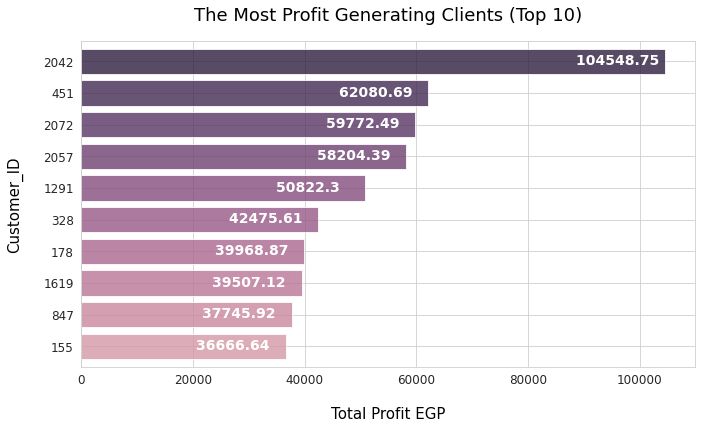

In [496]:
# The most profitable customer chart

c = sns.cubehelix_palette(13)[3:]

m_profitable_customer.plot(kind="barh",
                    rot = 0,
                    width = 0.8,
                    alpha = 0.8,
                    fontsize = 12,
                    color=c,
                    figsize=(11,6))
                

for i, v in enumerate(m_profitable_customer):
    plt.text(v-16000 , i-.1, str(round(v, 2))+" ", color='white', fontweight='bold', fontsize=14)#, ha='center', va='center')

plt.ylabel("Customer_ID",fontsize=15, color="k", labelpad=20, ha="center")
plt.xlabel("Total Profit EGP",fontsize=15, color="k", labelpad=20, ha="center")
plt.title("The Most Profit Generating Clients (Top 10)", fontsize=18, color="k", pad=20);

### Answer 7


**From above visualisation we can conclude:**

   -  The Highest Revenue Generating Clients are : 
   
           1. Client 2042
           2. Client 2398
           3. Client 2072
           
   -  The Most Profit Generating Clients are: 
   
           1. Client 2042
           2. Client 451
           3. Client 2072

### Research Question 8

> #### What are the revenue, profit and sold quantity trends per month?

In [727]:
# Revenue trend per month 

month_revenue = sales.groupby("Month").Revenue.sum()
month_revenue.to_frame()

,Revenue
Month,
2020-04,6.629097e+05
2020-05,1.327448e+06
2020-06,1.240978e+06
2020-07,1.291816e+06
2020-08,1.111031e+06
2020-09,1.091377e+06
2020-10,1.256482e+06
2020-11,1.217850e+06
2020-12,1.143943e+06


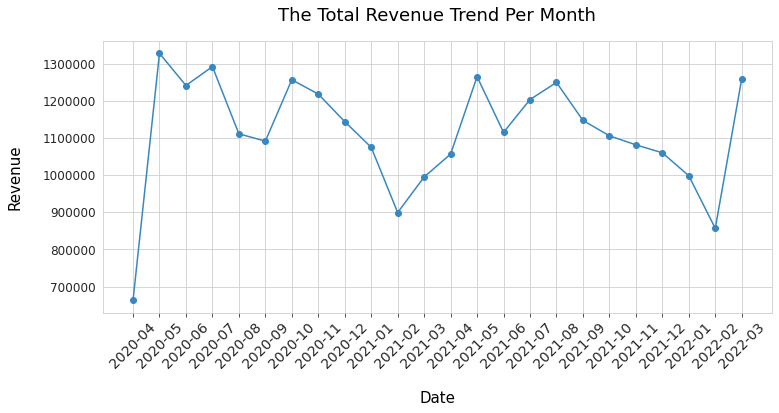

In [513]:
# Revenue trend per month 

c = sns.color_palette("Blues", 5)[3:5]

month_revenue.plot( marker="o",
                    alpha = 1,
                    fontsize = 12,
                    color=c, figsize=(12, 5))

xlbl = [i for i in month_revenue.index]


plt.ylabel("Revenue",fontsize=15, color="k", labelpad=20, ha="center")
plt.xlabel("Date",fontsize=15, color="k", labelpad=20, ha="center")
plt.title("The Total Revenue Trend Per Month", fontsize=18, color="k", pad=20);
plt.xticks(range(len(xlbl)), xlbl, fontsize=14, rotation=45)
plt.ticklabel_format(axis="y", style='plain')
plt.tick_params(bottom = True);

In [728]:
# Profit trend per month 

month_profit = sales.groupby("Month").Profit.sum()
month_profit.to_frame()

,Profit
Month,
2020-04,69929.646342
2020-05,132750.465425
2020-06,127064.207468
2020-07,123914.591711
2020-08,105596.129542
2020-09,111382.337539
2020-10,142621.496200
2020-11,118382.164190
2020-12,123097.467550


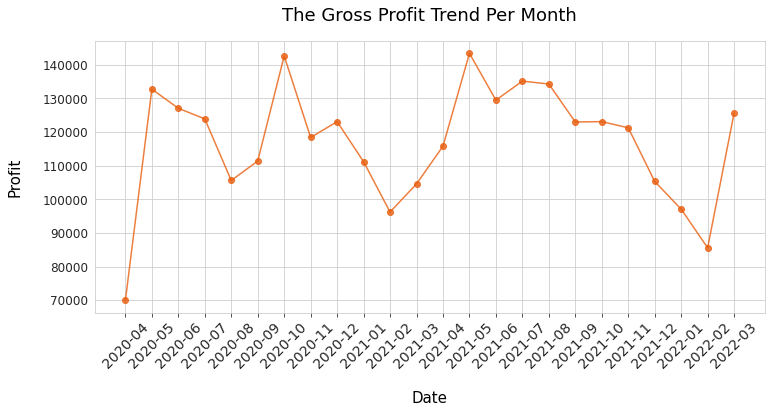

In [518]:
# Profit trend per month 

c = sns.color_palette("Oranges", 5)[3:4]

month_profit.plot(
                    marker = "o",
                    alpha = 0.8,
                    fontsize = 12,
                    color=c, figsize=(12, 5))

xlbl = [i for i in month_profit.index]


plt.ylabel("Profit",fontsize=15, color="k", labelpad=20, ha="center")
plt.xlabel("Date",fontsize=15, color="k", labelpad=20, ha="center")
plt.title("The Gross Profit Trend Per Month", fontsize=18, color="k", pad=20);
plt.xticks(range(len(xlbl)), xlbl, fontsize=14, rotation=45)
plt.ticklabel_format(axis="y", style='plain')
plt.tick_params(bottom = True);

In [729]:
# Revenue trend per day 

day_revenue = sales.groupby("Day").Revenue.sum()
day_revenue.to_frame()

,Revenue
Day,
0,4.386349e+06
1,4.399146e+06
2,4.238070e+06
3,4.189734e+06
4,4.318255e+06
5,1.983201e+04
6,5.158737e+06


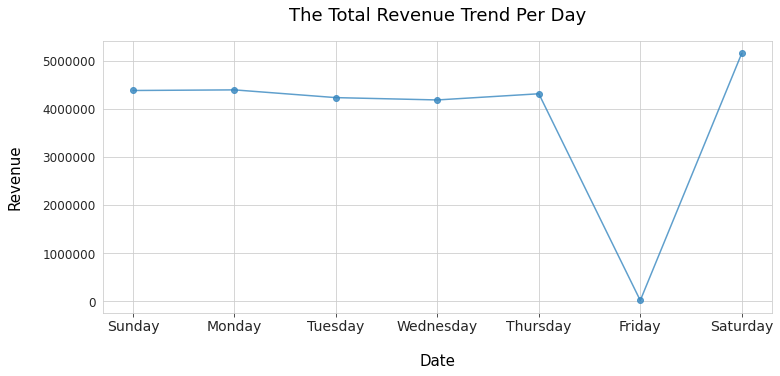

In [522]:
# Revenue trend per day line chart


c = sns.color_palette("Blues", 5)[3:5]

day_revenue.plot(
                    marker = "o",
                    alpha = 0.8,
                    fontsize = 12,
                    color=c, figsize=(12, 5))


xlbl = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]


plt.ylabel("Revenue",fontsize=15, color="k", labelpad=20, ha="center")
plt.xlabel("Date",fontsize=15, color="k", labelpad=20, ha="center")
plt.title("The Total Revenue Trend Per Day", fontsize=18, color="k", pad=20);
plt.xticks(range(len(xlbl)), xlbl, fontsize=14, rotation=0)
plt.ticklabel_format(axis="y", style='plain')
plt.tick_params(bottom = True);

In [730]:
# profit trend per day 

day_profit = sales.groupby("Day").Profit.sum()
day_profit.to_frame()

,Profit
Day,
0,460182.925949
1,463462.526645
2,442362.352117
3,439726.078293
4,450309.426978
5,2117.973300
6,547642.449424


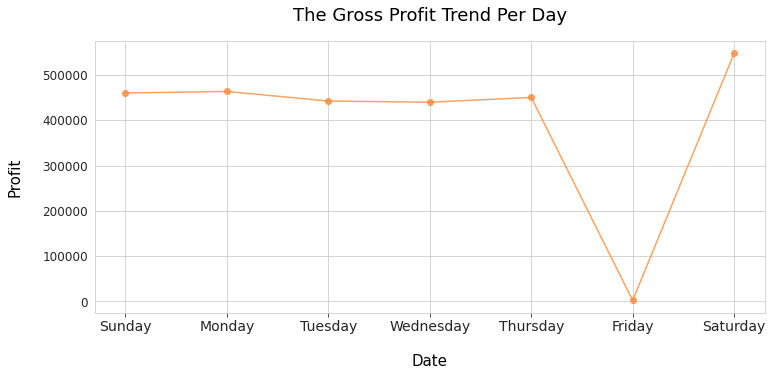

In [524]:
# profit trend per day line chart

c = sns.color_palette("Oranges", 1)

day_profit.plot(
                    marker = "o",
                    alpha = 0.8,
                    fontsize = 12,
                    color=c, figsize=(12, 5))


xlbl = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]


plt.ylabel("Profit",fontsize=15, color="k", labelpad=20, ha="center")
plt.xlabel("Date",fontsize=15, color="k", labelpad=20, ha="center")
plt.title("The Gross Profit Trend Per Day", fontsize=18, color="k", pad=20);
plt.xticks(range(len(xlbl)), xlbl, fontsize=14, rotation=0)
plt.ticklabel_format(axis="y", style='plain')
plt.tick_params(bottom = True);

### Answer 8


**From above visualisation we can conclude:**

   -  The Months with highest Revenue are : 
   
           1. May 2020
           2. July 2021
           3. May 2021
           
   -  The Months with highest Profit are : 
   
           1. May 2021
           2. ctober 2020
           3. July 2021

   - . The Days with highest Revenue are : 
   
           1. Saturday
           2. Monday
           3. Sunday
           
   - . The Days with highest Profit are : 
   
           1. Saturday
           2. Monday
           3. Sunday
           

### Research Question 9

> #### Is there a correlation between 
	- Sales_Price and profit?
	- Cost and profit?
	- Quantity and profit?

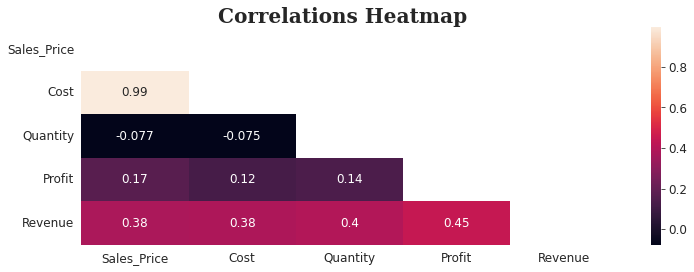

In [526]:
fig = plt.subplots(figsize=(12,4))

cols = ["Sales_Price", "Cost", "Quantity", "Profit", "Revenue"]
corr_matrix = sales[cols].corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, annot=True, mask=mask )
#sns.heatmap(df_test[count].corr(),ax=ax[1], annot=True)
plt.xticks( rotation=0)
plt.yticks( rotation=0)

plt.text(-0.1, -0.1, '                     Correlations Heatmap', fontsize=20, fontweight='bold', fontfamily='serif');

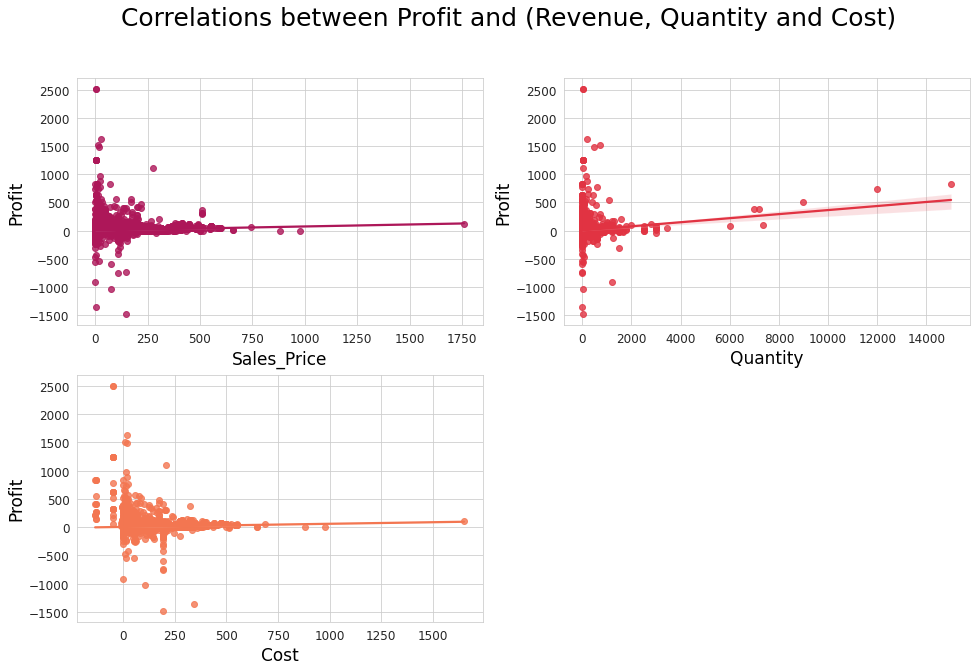

In [554]:
# Scatter plot between Profit and (Revenue, Quantity and Cost)

c = sns.color_palette("rocket")[2:5]

fig,ax = plt.subplots(2,2,figsize=(16,10))
k=0
j=0
i = 0
for col in ["Sales_Price", "Quantity", "Cost"]:
    
    sns.regplot(data = sales, x = col, y = "Profit", ax = ax[k,j], color= c[i])
    i+=1
    ax[k,j].set_xlabel(col, fontsize=17, color="k")
    ax[k,j].set_ylabel("Profit", fontsize=17, color="k")
    #ax[k,j].set_xticklabels(fontsize=11, color="k")
    if j>=1:
        k+=1
        j=-1
    j+=1
fig.suptitle('Correlations between Profit and (Sales_Price, Quantity and Cost)', fontsize=25, color="k")
plt.subplots_adjust(hspace = 0.2, wspace=0.2)
ax[1, 1].set_visible(False);

### Answer 9

**From above visualisation we can conclude:**

   1. There is no strong correlation between Sales_Price and Profit.
   2. There is no strong correlation between Cost and Profit.
   3. There is no strong correlation between Quantity and Profit.

### Research Question 10

> #### Do the most expensive Producrs generte the most profit?

In [737]:
price_levels_profit_sum = sales.groupby("price_level").Profit.sum().sort_values(ascending=True)
price_levels_profit_sum.to_frame()

,Profit
price_level,
Low,5.611865e+05
Medium,5.658495e+05
High,6.442301e+05
Very High,1.034538e+06


In [738]:
price_levels_profit_mean = sales.groupby("price_level").Profit.mean().sort_values(ascending=True)
price_levels_profit_mean.to_frame()

,Profit
price_level,
Low,4.281023
Medium,4.331763
High,4.858777
Very High,8.018925


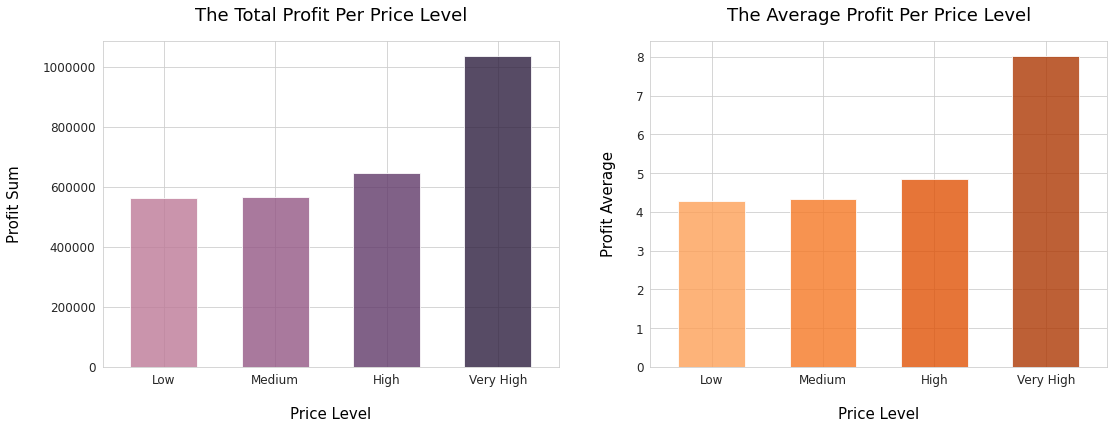

In [692]:
c = sns.cubehelix_palette(6)[2:]
c2 = sns.color_palette("Oranges", 6)[2:]
fig,ax = plt.subplots(1,2,figsize=(18,6))

price_levels_profit_sum.plot(kind="bar",
                    rot = 0,
                    width = 0.6,
                    alpha = 0.8,
                    fontsize = 12,
                    color=c,ax=ax[0])


price_levels_profit_mean.plot(kind="bar",
                    rot = 0,
                    width = 0.6,
                    alpha = 0.8,
                    fontsize = 12,
                    color=c2, ax=ax[1])
ax[0].ticklabel_format(axis="y", style='plain')
ax[1].ticklabel_format(axis="y", style='plain')



ax[0].set_ylabel("Profit Sum",fontsize=15, color="k", labelpad=20, ha="center")
ax[0].set_xlabel("Price Level",fontsize=15, color="k", labelpad=20, ha="center")
ax[0].set_title("The Total Profit Per Price Level", fontsize=18, color="k", pad=20);




ax[1].set_ylabel("Profit Average",fontsize=15, color="k", labelpad=20, ha="center")
ax[1].set_xlabel("Price Level",fontsize=15, color="k", labelpad=20, ha="center")
ax[1].set_title("The Average Profit Per Price Level", fontsize=18, color="k", pad=20);

### Answer 10

**From above visualisation we can conclude:**

   1. The Most expensive Producrs generte the most Profit on average.
   2. The Most expensive Producrs generte the most total Profit.
   3. The Most cheap Producrs generte the lowest Profit on average.
   4. The Most cheap Producrs generte the lowest total Profit.

<a id='conclusions'></a>
## Conclusions

**1. Revenue Gross Profit and COGS:**


 * The total Revenue is: 26710123.05 EGP.
 
 
 * The Gross Profit is: 2805803.73 EGP.
 
 
 * The COGS is: 23904319.32 EGP.
 
 
 * The Gross Profit is: 10.5% from total Revenue.
 
 
 * The COGS is: 89.5% from total Revenue.
 
 
**2. Revenue, Profit, Quantity and Cost:**
 
 
 * There are approximate 60000 observation have Revenue less than 15 EGP.
 
 
 * There are approximate 118000 observation have Cost 5 EGP or less.
 
 
 * Revenue, Profit, Quantity and Cost have a right skewed distribution that means:
        
        - The observation with small amounts of (Revenue, Profit, Quantity and Cost) are the most frequant (less than 50 EGP).

        - The observation with large amounts of (Revenue, Profit, Quantity and Cost) are the least frequant (more than 50 EGP).



 
**3. Products Revenue, Profit and Quantity:**
 
 
 * The Highest Revenue Products are: 
 
      1. سرنجات ماسكو 5سم /120سرنجه 
      2. اولويز دوبل ليلي 10%خصم16ق                  
      3. سرنجات ماسكو 3سم كبار /150سرنجه لور لوك 
 
 
 * The Most Sold Products are:

     1. سرنجات ماسكو 3سم كبار /150سرنجه لوك
     2. سرنجات ماسكو 5سم /120سرنجه
     3. سرنجات ماسكو 3سم كبار /150سرنجه لور لوك 
     
 
 * The Most Profitable Products are:

     1. ترمومتر ديجيتال
     2. كاندم عازل صيني (سوترا) 24قطعه
     3. سرنجات دواء اطفال بابلز 5سم
 


**4. Categories Revenue, Profit and Quantity:**


 * The Highest Revenue Categories are:

     1. اكسسوار
     2. مستلزمات
     3. ورقيات
     
     
 * The Most Sold Categories are:

     1. مستلزمات
     2. اكسسوار
     3. ورقيات


* The Most Profitable Categories are:

     1. اكسسوار
     2. مستلزمات
     3. ورقيات


**5. SubCategories Revenue, Profit and Quantity:**


 * The Highest Revenue Subategories are:

     1. حفاضات نسائية
     2. حفاضات
     3. سرنجات


 * The Most Sold Subategories are:

     1. سرنجات
     2. حفاضات نسائية
     3. معجون اسنان


 * The Most Profitable Subategories are:

     1. حفاضات نسائية
     2. معجون اسنان
     3. حفاضات
 
 
 

**6. Regions Revenue, Profit and Quantity:**
 
 
 * The Regions With Highest Revenue are:

     1. Region1147
     2. Region1-24
     3. Region1-62


 * The Regions With Most Sold Products are:

     1. Region11040
     2. Region1147
     3. Region171


 * The Most Profitable Regions are:

     1. Region1-62
     2. Region1-24
     3. Region1147

 
 
 
 
 
**7. Manufacturers Revenue and Profit:**
  

 * The Highest Revenue Generating Manufacturers are:

      - متنوع
      - بروكتر
      - ليفر
      - ايفا
 
 
 * The Most Profit Generating manufacturer are:

      - متنوع
      - بروكتر
      - ليفر
      - ايفا
  
  
  
**7. Clients Revenue and Profit :**


 * The Highest Revenue Generating Clients are :

     1. Client 2042
     2. Client 2398
     3. Client 2072
     
     
 * The Most Profit Generating Clients are:

     1. Client 2042
     2. Client 451
     3. Client 2072
 
**8. Months Revenue and Profit Trends:**

 * The Months with highest Revenue are :

     1. May 2020
     2. July 2021
     3. May 2021
     
 * The Months with highest Profit are :

     1. May 2021
     2. ctober 2020
     3. July 2021


**9. Days Revenue and Profit Trends:**



* The Days with highest Revenue are :

    1. Saturday
    2. Monday
    3. Sunday

 * The Days with highest Profit are :

    1. Saturday
    2. Monday
    3. Sunday
    
    
    
**9. Sales_Price, Cost and Quantity correlations with Profit:**

   - There is no strong correlation between Sales_Price and Profit.
   - There is no strong correlation between Cost and Profit.
   - There is no strong correlation between Quantity and Profit.




**8. The Relation between Price Levels and (Profit & Revenue):**


   - The Most expensive Producrs generte the most Profit on average.
   - The Most expensive Producrs generte the most total Profit.
   - The Most cheap Producrs generte the lowest Profit on average.
   - The Most cheap Producrs generte the lowest total Profit.

<a id='limitation'></a>
## Limitations


### Outliers Conclusion

**There are alot of Nans on Category, Subcategory, Manufacturer and Region columns All of them replaced with `Unknown` so if there is any Unknown value ranked that means this rank is for the sum of all empty values in this field not for specific Category, Subatgeory, Manufacturer or Region.**

**There are 7 observations with Sales_Price more than 600 EGP.** 

**There are 120 observations with Sales_Price Zero EGP.**

**There are 66 observations with Cost Zero EGP.** 

**There are 8 observations with Cost less than Zero EGP.** 

**There are 21 observations with Cost more than 500 EGP.**

**There is a typing mistake in the Cost it is 8167 EGP instead of 8.167 EGP.** 

**There are 1481 observations with Profit Zero EGP.** 

**There are 10663 observations with Profit less than Zero EGP (LOST).** 

**There is one observation with Cost 14.07, Sales_price 144.86949, Quantity 99  with total profit 12954.38 EGP. It will be considered as a typing issue and I'll fix the Sales price to 14.486949.**

**There are 1444 observations "قطن" with Quantity less than 0.5 unit.**

**There are 2111 observations "سرنجات" with Quantity more than 300 units.**
 
 **There are 5 observations that have typing mistakes.** 
   
   observations indexes:(
      - `28094` 
      - `441589` 
      - `114203`
      - `114228`
      - `114464`
      - `122634`
      )
